## Dataset Description

### Etiquetas

El conjunto de datos se proporciona en formato CSV (train.csv) y contiene información sobre 732 pacientes con diferentes grados de enfermedad (1-4) o ausencia de la misma (0). Este dato puede obtenerse de la columna 'label'.

### Características

Además, el conjunto de datos está compuesto por 13 características adicionales que describen las condiciones de salud de cada uno de los pacientes. Estas características se describen a continuación:

1. **age**: Edad del paciente.
2. **sex**: Sexo del paciente.
3. **cp**: Tipo de dolor de pecho:
   - 1: Angina típica
   - 2: Angina atípica
   - 3: Dolor no-anginoso
   - 4: Asintomático
4. **trestbps**: Presión arterial en reposo (en mm Hg al ingreso en el hospital).
5. **chol**: Colesterol sérico en mg/dl.
6. **fbs**: Dolor provocado por el esfuerzo (1 = sí; 0 = no).
7. **restecg**: Resultados electrocardiográficos en reposo:
   - 0: Normal
   - 1: Presenta anormalidad de la onda ST-T
   - 2: Presenta probable o definida hipertrofía ventricular izquierda
8. **thalach**: Frecuencia cardiaca en reposo.
9. **exang**: Angina inducida por el ejercicio (1 = sí; 0 = no).
10. **oldpeak**: Depresión del ST inducida por el ejercicio en relación con el reposo.
11. **slope**: La pendiente del segmento ST en ejercicio máximo:
    - 1: Pendiente ascendente
    - 2: Plano
    - 3: Pendiente descendente
12. **ca**: Número de vasos mayores (0-3) coloreados por fluoroscopía.
13. **thal**:
    - 3: Normal
    - 6: Defecto fijo
    - 7: Defecto reversible


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline

## 1- Analisis Exploratorio

### A - Análisis descriptivo del dataset de entrenamiento (TRAIN)

In [3]:
train = pd.read_csv("train.csv")
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2
2,63.0,1.0,4.0,140,0,?,2.0,149,0,2,1,?,?,2
3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46.0,1.0,3.0,120.0,230.0,0.0,0.0,150.0,0.0,0.0,-9.0,-9.0,-9.0,0
728,62.0,1.0,3.0,?,204,0,1.0,?,?,?,?,?,?,1
729,43.0,0.0,3.0,122.0,213.0,0.0,0.0,165.0,0.0,0.2,2.0,0.0,3.0,0
730,68.0,1.0,3.0,150,195,1,0.0,132,0,0,?,?,6,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  732 non-null    object 
 4   chol      732 non-null    object 
 5   fbs       732 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    object 
 8   exang     732 non-null    object 
 9   oldpeak   732 non-null    object 
 10  slope     732 non-null    object 
 11  ca        732 non-null    object 
 12  thal      732 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 80.2+ KB


In [5]:
# Contar la cantidad de filas con valores faltantes
missing_values_count = train[train == '?'].count()

# Ordenar los valores de mayor a menor
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

# Mostrar el conteo de valores faltantes por característica ordenados
print("Valores faltantes por variable en TRAIN:")
print(missing_values_count_sorted)

# Calcular el porcentaje de valores faltantes por característica
missing_percentage = (missing_values_count_sorted / len(train)) * 100

# Mostrar el porcentaje de valores faltantes por característica
print("\nPorcentaje de valores faltantes por variable en TRAIN:")
print(missing_percentage)

Valores faltantes por variable en TRAIN:
ca          249
thal        169
slope        95
fbs          58
oldpeak      49
trestbps     47
thalach      44
exang        44
chol          5
age           0
sex           0
cp            0
restecg       0
label         0
dtype: int64

Porcentaje de valores faltantes por variable en TRAIN:
ca          34.016393
thal        23.087432
slope       12.978142
fbs          7.923497
oldpeak      6.693989
trestbps     6.420765
thalach      6.010929
exang        6.010929
chol         0.683060
age          0.000000
sex          0.000000
cp           0.000000
restecg      0.000000
label        0.000000
dtype: float64


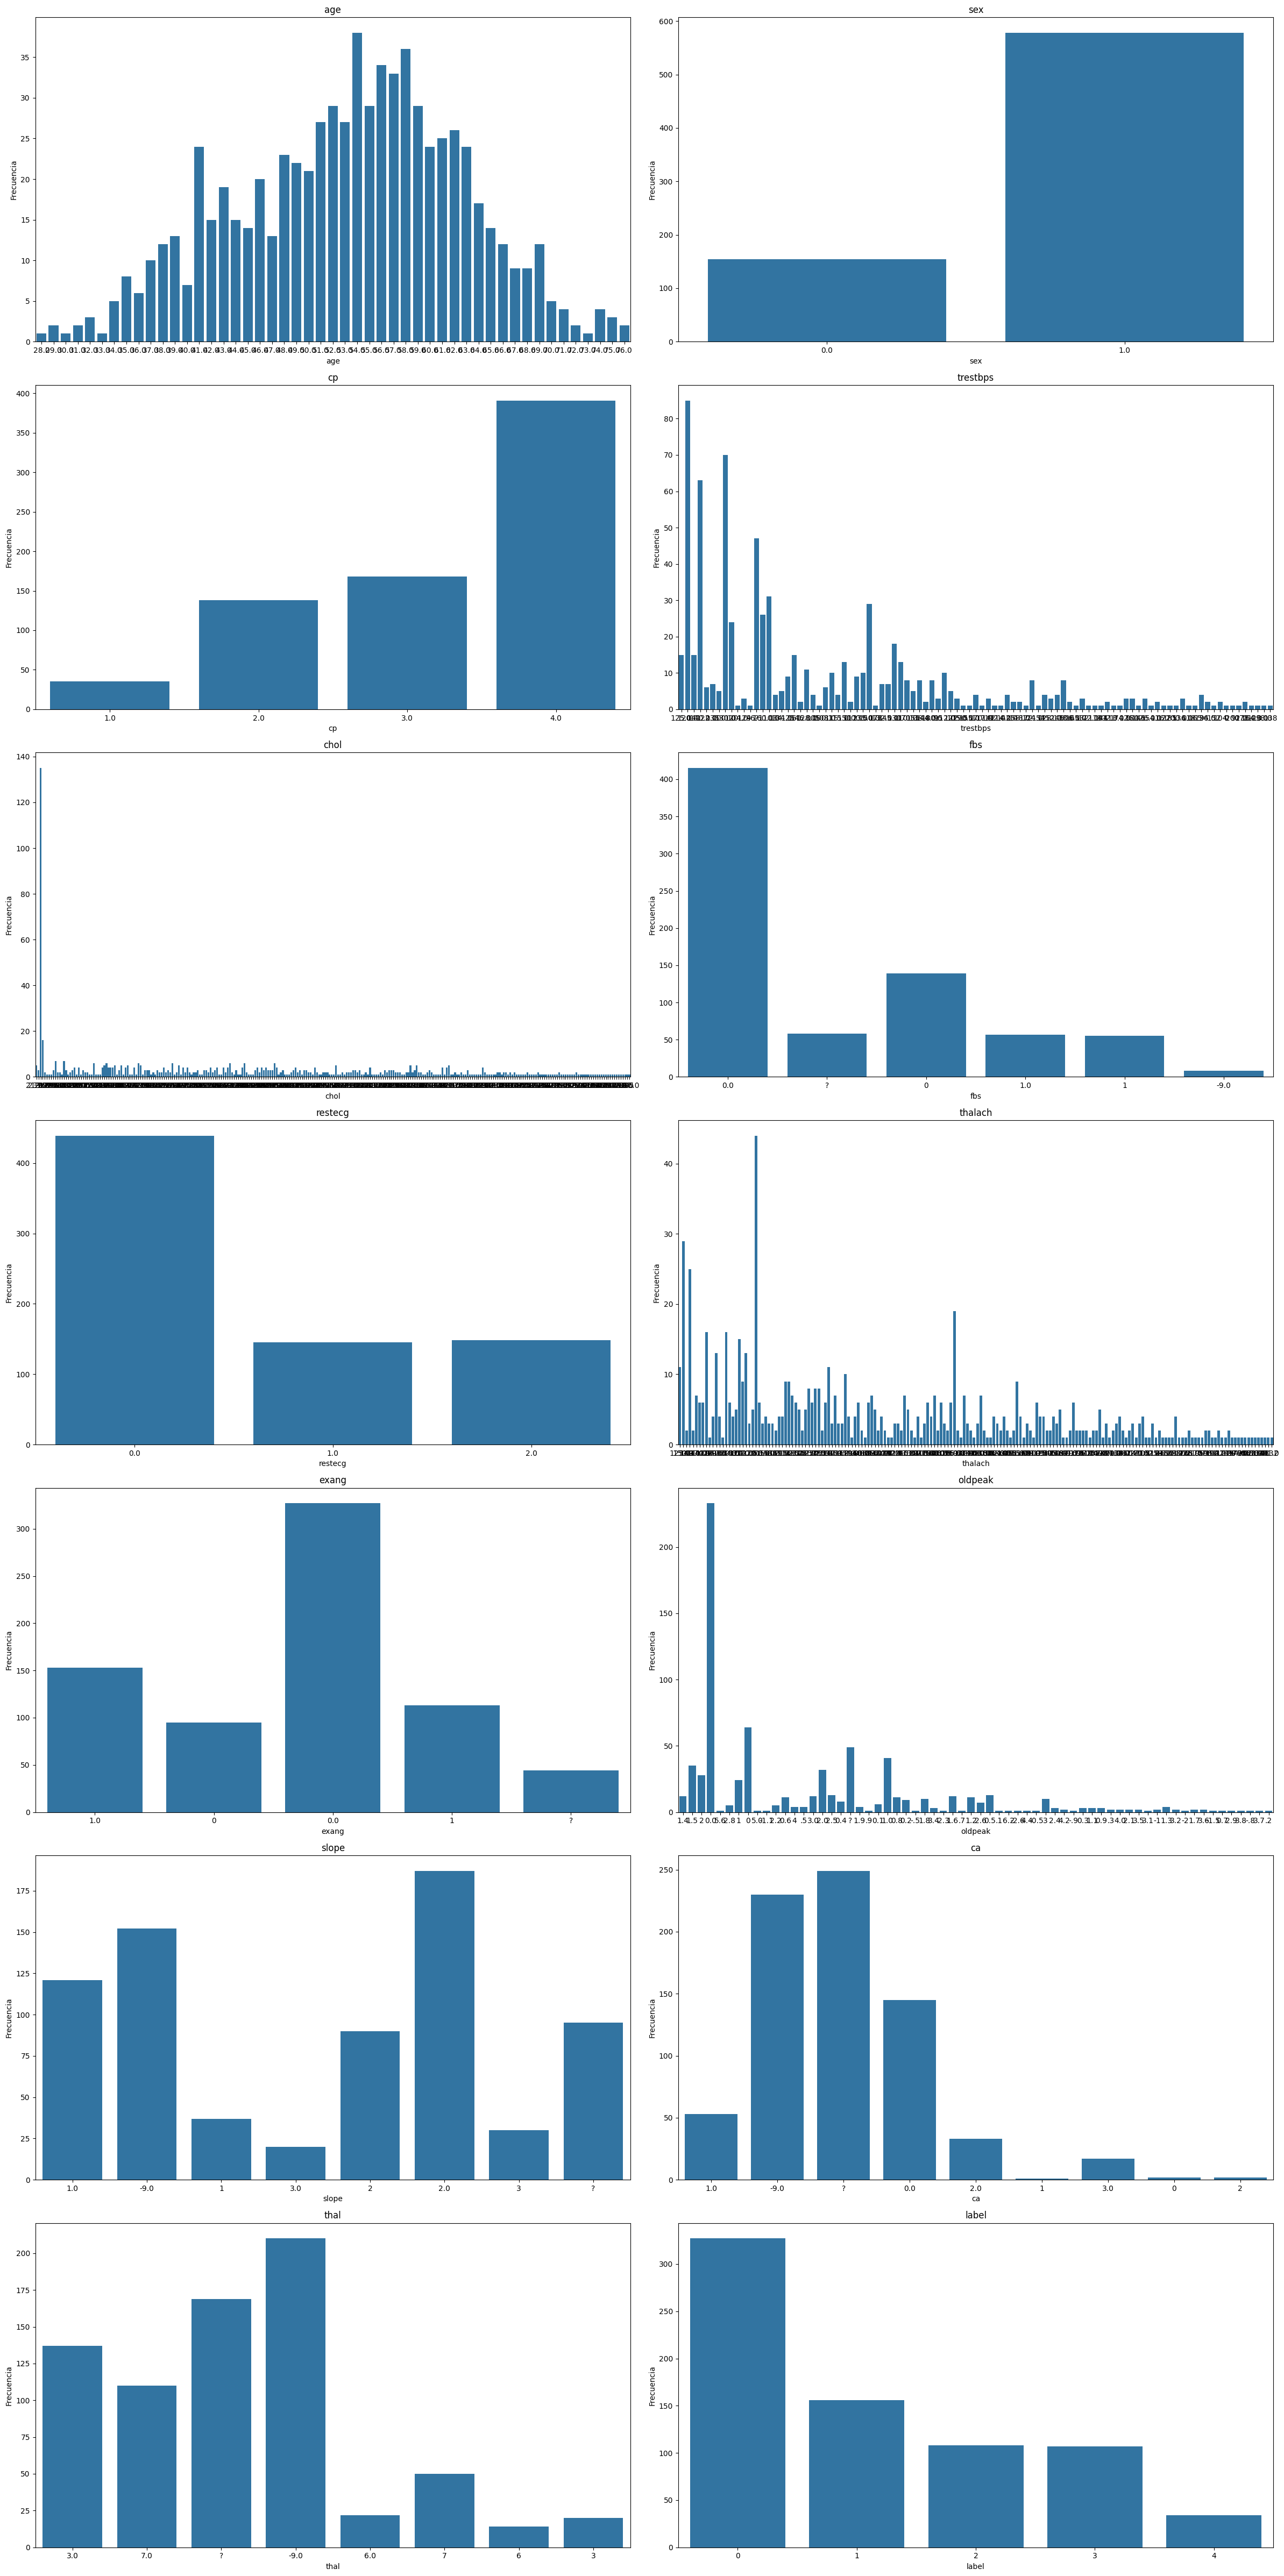

In [6]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label']

# Subgráficos
num_cols = 2
num_rows = int(np.ceil(len(cols) / num_cols))

# Crear subplots para cada variable 
plt.figure(figsize=(24, 48))
for i, col in enumerate(cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=train, x=col)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


### B - Análisis descriptivo del dataset de testeo (TEST)

In [7]:
test = pd.read_csv("test.csv")
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.0,4.0,156,173,0,2,119,1,3,3,?,?
1,52.0,1.0,2.0,160.0,196.0,0.0,0.0,165.0,0.0,0.0,-9.0,-9.0,-9.0
2,48.0,1.0,2.0,100.0,-9.0,0.0,0.0,100.0,0.0,0.0,-9.0,-9.0,-9.0
3,62.0,1.0,4.0,115,0,?,0,128,1,2.5,3,?,?
4,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54.0,1.0,4.0,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,-9.0,-9.0
180,55.0,1.0,2.0,110,214,1,1,180,0,?,?,?,?
181,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0
182,59.0,1.0,1.0,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    float64
 1   sex       184 non-null    float64
 2   cp        184 non-null    float64
 3   trestbps  184 non-null    object 
 4   chol      184 non-null    object 
 5   fbs       184 non-null    object 
 6   restecg   184 non-null    object 
 7   thalach   184 non-null    object 
 8   exang     184 non-null    object 
 9   oldpeak   184 non-null    object 
 10  slope     184 non-null    object 
 11  ca        184 non-null    object 
 12  thal      184 non-null    object 
dtypes: float64(3), object(10)
memory usage: 18.8+ KB


In [9]:
# Contar la cantidad de filas con valores faltantes
missing_values_count = test[test == '?'].count()

# Ordenar los valores de mayor a menor
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

# Mostrar el conteo de valores faltantes por característica ordenados
print("Valores faltantes por variable en TEST:")
print(missing_values_count_sorted)

# Calcular el porcentaje de valores faltantes por característica
missing_percentage = (missing_values_count_sorted / len(test)) * 100

# Mostrar el porcentaje de valores faltantes por característica
print("\nPorcentaje de valores faltantes por variable en TEST:")
print(missing_percentage)

Valores faltantes por variable en TEST:
ca          69
thal        49
slope       24
fbs         23
oldpeak     13
trestbps    11
thalach     10
exang       10
chol         2
restecg      1
age          0
sex          0
cp           0
dtype: int64

Porcentaje de valores faltantes por variable en TEST:
ca          37.500000
thal        26.630435
slope       13.043478
fbs         12.500000
oldpeak      7.065217
trestbps     5.978261
thalach      5.434783
exang        5.434783
chol         1.086957
restecg      0.543478
age          0.000000
sex          0.000000
cp           0.000000
dtype: float64


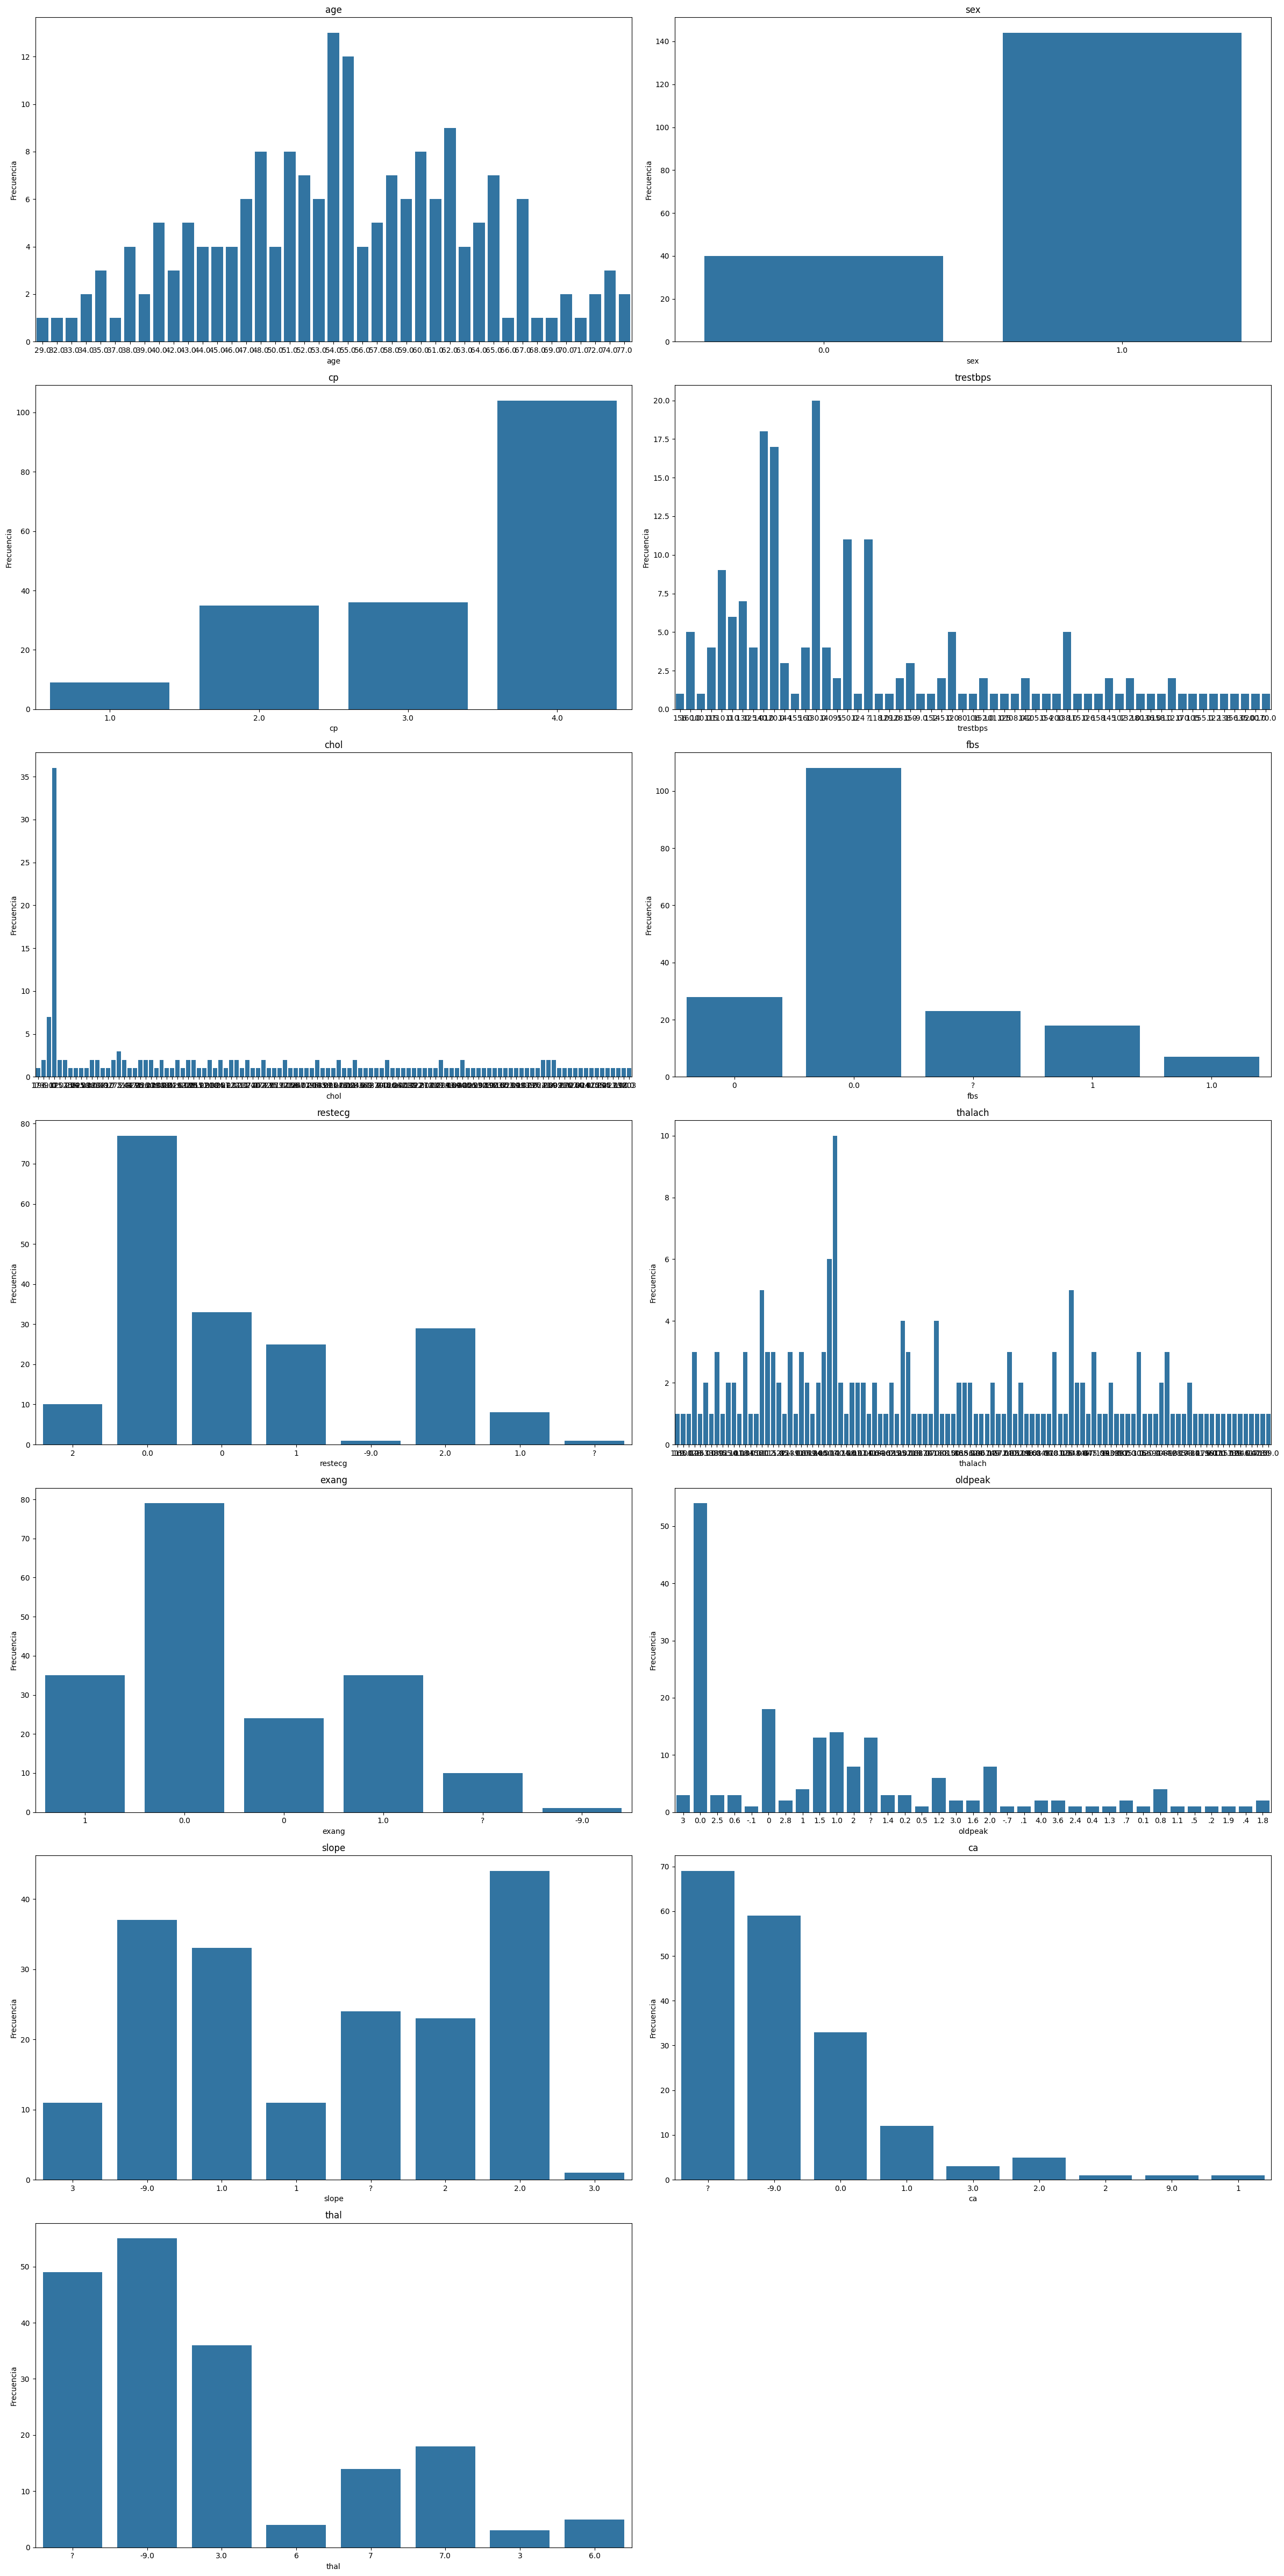

In [10]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Subgráficos
num_cols = 2
num_rows = int(np.ceil(len(cols) / num_cols))

# Crear subplots para cada variable 
plt.figure(figsize=(24, 48))
for i, col in enumerate(cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=test, x=col)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

## 2 -Tratamiento del Dataset

### A- Transformaciones dataset TRAIN

#### Definicion de datatypes

In [11]:
train = pd.read_excel("train_2.xlsx")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       689 non-null    int64 
 1   sex       689 non-null    int64 
 2   cp        689 non-null    int64 
 3   trestbps  689 non-null    object
 4   chol      689 non-null    object
 5   fbs       689 non-null    object
 6   restecg   689 non-null    int64 
 7   thalach   689 non-null    object
 8   exang     689 non-null    object
 9   oldpeak   689 non-null    object
 10  slope     689 non-null    object
 11  ca        689 non-null    object
 12  thal      689 non-null    object
 13  label     689 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 75.5+ KB


In [12]:
# Reemplazar '?' con NaN 
train = train.replace('?', np.nan)

# Convertir variables discretas a numericas
int_cols = ['age', 'label', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']
train[int_cols] = train[int_cols].apply(pd.to_numeric, errors='coerce')

# Convertir variables a continuas a numericas
float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
train[float_cols] = train[float_cols].apply(pd.to_numeric, errors='coerce')

# Iterar sobre las columnas numéricas y reemplazar los valores negativos por NaN, y -9 por NaN solo en 'oldpeak'
for col in int_cols + float_cols:
    if col == 'oldpeak':
        train[col] = train[col].replace(-9, np.nan)
    else:
        train[col] = train[col].apply(lambda x: np.nan if pd.isnull(x) or x < 0 else x)

# Convertir las columnas discretas a tipo entero
train[int_cols] = train[int_cols].astype('Int64')

# Verificar la información del DataFrame
#train['oldpeak'].describe()
train

/var/folders/gb/qf4chfw11j5dsg0zrngx5sy00000gn/T/ipykernel_2031/2749691842.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train = train.replace('?', np.nan)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0,2,125.0,1,1.4,1,1,3,0
1,54,1,3,120.0,237.0,0,0,150.0,1,1.5,<NA>,<NA>,7,2
2,63,1,4,140.0,0.0,<NA>,2,149.0,0,2.0,1,<NA>,<NA>,2
3,52,0,2,140.0,NaN,0,0,140.0,0,0.0,<NA>,<NA>,<NA>,0
4,55,1,4,140.0,217.0,0,0,111.0,1,5.6,3,0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,52,1,1,152.0,298.0,1,0,178.0,0,1.2,2,0,7,0
685,46,1,3,120.0,230.0,0,0,150.0,0,0.0,<NA>,<NA>,<NA>,0
686,43,0,3,122.0,213.0,0,0,165.0,0,0.2,2,0,3,0
687,68,1,3,150.0,195.0,1,0,132.0,0,0.0,<NA>,<NA>,6,1


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       689 non-null    Int64  
 1   sex       689 non-null    Int64  
 2   cp        689 non-null    Int64  
 3   trestbps  685 non-null    float64
 4   chol      670 non-null    float64
 5   fbs       623 non-null    Int64  
 6   restecg   689 non-null    Int64  
 7   thalach   688 non-null    float64
 8   exang     688 non-null    Int64  
 9   oldpeak   683 non-null    float64
 10  slope     485 non-null    Int64  
 11  ca        253 non-null    Int64  
 12  thal      353 non-null    Int64  
 13  label     689 non-null    Int64  
dtypes: Int64(10), float64(4)
memory usage: 82.2 KB


Sampler para nivelar clases

In [14]:
test = train.copy()

# Calcular el número máximo de NaN por fila
test['num_nan'] = test.isnull().sum(axis=1)

# Ordenar el DataFrame por el número de NaN por fila de forma descendente
test_sorted = test.sort_values(by='num_nan', ascending=True)

# Establecer el número mínimo de muestras por clase
min_samples = 500

# Calcular la cantidad mínima de muestras para cada clase en función del total de clases
min_samples_per_class = {label: min_samples for label in test['label'].unique()}

# Calcular el número máximo de muestras para cada clase
max_samples_per_class = {label: count for label, count in test['label'].value_counts().items()}

# Ajustar el parámetro sampling_strategy para que no pida más muestras de las disponibles
sampling_strategy = {label: min(min_samples_per_class[label], max_samples_per_class[label]) for label in test['label'].unique()}

# Instanciar el objeto RandomUnderSampler con el muestreo estratégico
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)

# Eliminar la columna 'num_nan' antes de aplicar el submuestreo
X_resampled, y_resampled = undersampler.fit_resample(test_sorted.drop(columns=['label', 'num_nan']), test_sorted['label'])

# Crear un nuevo DataFrame con los datos submuestreados
train_resampled = pd.concat([pd.DataFrame(X_resampled, columns=test_sorted.drop(columns=['label', 'num_nan']).columns),
                             pd.Series(y_resampled, name='label')], axis=1)

# Verificar la distribución de clases después del submuestreo
print(train_resampled['label'].value_counts())

# Eliminar la columna 'num_nan' del DataFrame resultante
train_resampled = train_resampled[train.columns]

# Mostrar el DataFrame resultante
train_resampled


label
0    311
1    148
2    101
3     97
4     32
Name: count, dtype: Int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
452,54,1,2,110.0,208.0,0,0,142.0,0,0.0,<NA>,<NA>,<NA>,0
342,44,1,2,120.0,220.0,0,0,170.0,0,0.0,1,0,3,0
661,52,1,1,118.0,186.0,0,2,190.0,0,0.0,2,0,6,0
631,64,1,1,170.0,227.0,0,2,155.0,0,0.6,2,0,7,0
220,49,0,2,134.0,271.0,0,0,162.0,0,0.0,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,56,1,3,170.0,0.0,0,2,123.0,1,2.5,<NA>,<NA>,<NA>,4
340,49,1,4,150.0,222.0,0,0,122.0,0,2.0,2,<NA>,<NA>,4
9,50,1,4,140.0,231.0,0,1,140.0,1,5.0,2,<NA>,<NA>,4
358,70,1,4,145.0,174.0,0,0,125.0,1,2.6,3,0,7,4


#### Reemplazo de valores missing

##### **Opcion 2** - Analisis de cada variable imputando valores faltantes en base a la mediana de combinaciones con edad y sexo.

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       689 non-null    Int64  
 1   sex       689 non-null    Int64  
 2   cp        689 non-null    Int64  
 3   trestbps  685 non-null    float64
 4   chol      670 non-null    float64
 5   fbs       623 non-null    Int64  
 6   restecg   689 non-null    Int64  
 7   thalach   688 non-null    float64
 8   exang     688 non-null    Int64  
 9   oldpeak   683 non-null    float64
 10  slope     485 non-null    Int64  
 11  ca        253 non-null    Int64  
 12  thal      353 non-null    Int64  
 13  label     689 non-null    Int64  
dtypes: Int64(10), float64(4)
memory usage: 82.2 KB


In [16]:
#Copia del df
train_copy_b =  train.copy()


int_cols = ['age', 'label', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']
float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']

print(train_copy_b.isnull().sum())
train_copy_b

age           0
sex           0
cp            0
trestbps      4
chol         19
fbs          66
restecg       0
thalach       1
exang         1
oldpeak       6
slope       204
ca          436
thal        336
label         0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0,2,125.0,1,1.4,1,1,3,0
1,54,1,3,120.0,237.0,0,0,150.0,1,1.5,<NA>,<NA>,7,2
2,63,1,4,140.0,0.0,<NA>,2,149.0,0,2.0,1,<NA>,<NA>,2
3,52,0,2,140.0,NaN,0,0,140.0,0,0.0,<NA>,<NA>,<NA>,0
4,55,1,4,140.0,217.0,0,0,111.0,1,5.6,3,0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,52,1,1,152.0,298.0,1,0,178.0,0,1.2,2,0,7,0
685,46,1,3,120.0,230.0,0,0,150.0,0,0.0,<NA>,<NA>,<NA>,0
686,43,0,3,122.0,213.0,0,0,165.0,0,0.2,2,0,3,0
687,68,1,3,150.0,195.0,1,0,132.0,0,0.0,<NA>,<NA>,6,1


### Conclusión

A partir de la salida de train.info() y isnull(), se observa que en nuestro conjunto de datos hay 689 registros y 14 columnas.

Las columnas "age", "sex", "cp", "restecg", "exang" y "label" contienen solo valores no nulos, lo que significa que no hay valores faltantes en estas columnas.
Las columnas "trestbps", "chol", "fbs", "thalach", "oldpeak", "slope", "ca" y "thal" tienen valores faltantes.
En las columnas "trestbps", "chol", "fbs", "thalach" y "oldpeak" faltan menos del 10% de los valores, lo que nos permite considerar diferentes métodos para completar los datos faltantes.
En las columnas "slope", "ca" y "thal" falta más del 40% de los valores, lo que podría resultar en la pérdida de una parte significativa de la información si decidimos completarlos.

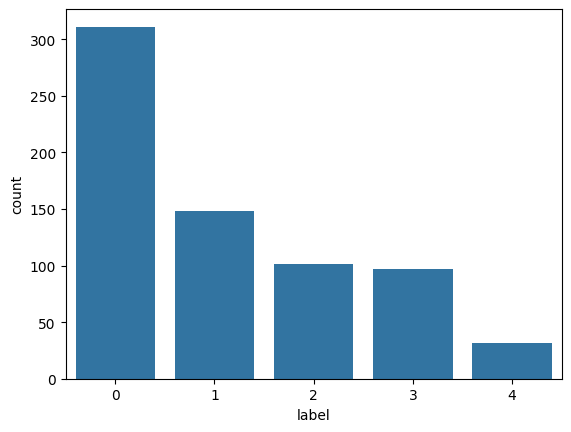

In [17]:
# Create a bar chart of the exang distribution
sns.countplot(x='label', data=train)
plt.show()

### Conclusión

Después de analizar los valores de la etiqueta, observamos que la mayoría de los datos corresponden a "0". Los valores "1", "2" y "3" tienen aproximadamente la misma cantidad en promedio, mientras que el valor "4" es el menos representado.

/var/folders/gb/qf4chfw11j5dsg0zrngx5sy00000gn/T/ipykernel_2031/792020800.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy_b['chol'].replace(0, np.nan, inplace=True)


2
240.83842794759826


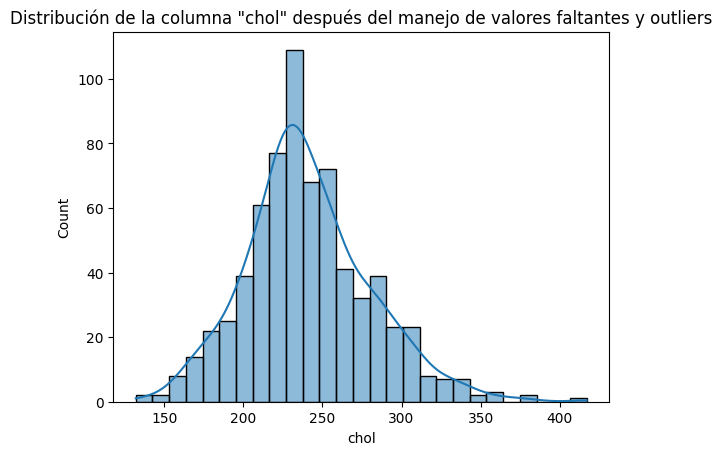

/var/folders/gb/qf4chfw11j5dsg0zrngx5sy00000gn/T/ipykernel_2031/792020800.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_copy_b['chol'] = train_copy_b['chol'].fillna(np.nan).astype(float)


0      213.0
1      237.0
2      254.0
3      203.0
4      217.0
       ...  
684    298.0
685    230.0
686    213.0
687    195.0
688    306.0
Name: chol, Length: 689, dtype: float64

In [51]:
int_cols = ['age', 'label', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']
float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Reemplazar los valores de 'chol' que son 0 con NaN
train_copy_b['chol'].replace(0, np.nan, inplace=True)

# Calcular el promedio 'chol' para cada combinación de edad y género
average_chol = train_copy_b.groupby(['age', 'sex'])['chol'].median()

# Definir una función para reemplazar los valores faltantes en 'chol' con el promedio correspondiente
def fill_missing_chol(row):
    if pd.isnull(row['chol']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_chol:
            return average_chol[(age, sex)]
    return row['chol']

# Aplicar la función de imputación para reemplazar los valores faltantes en 'chol'
train_copy_b['chol'] = train_copy_b.apply(fill_missing_chol, axis=1)

# Identificar y reemplazar los outliers en 'chol' con el promedio correspondiente
def replace_outliers_chol(row):
    age = row['age']
    sex = row['sex']
    median_chol = average_chol.get((age, sex), np.nan)
    if not pd.isnull(median_chol):
        if abs(row['chol'] - median_chol) > 2 * train_copy_b['chol'].std():
            return median_chol
    return row['chol']

# Aplicar la función para reemplazar outliers
train_copy_b['chol'] = train_copy_b.apply(replace_outliers_chol, axis=1)

# Imprimir la cantidad de valores faltantes después de la imputación y el promedio actualizado
print(train_copy_b['chol'].isnull().sum())
print(train_copy_b['chol'].mean())

# Imprimir la distribución de la columna 'chol' después de manejar los valores faltantes y los outliers
sns.histplot(train_copy_b['chol'].dropna(), kde=True)
plt.title('Distribución de la columna "chol" después del manejo de valores faltantes y outliers')
plt.show()

train_copy_b['chol'] = train_copy_b['chol'].fillna(np.nan).astype(float)
train_copy_b['chol']

### Conclusión

Después de realizar la imputación y el manejo de outliers en la columna "chol", observamos lo siguiente:

La cantidad de valores faltantes después de la imputación es [cantidad de valores faltantes].
El promedio actualizado de la columna "chol" es [promedio actualizado].
La distribución de la columna "chol" después de manejar los valores faltantes y los outliers se muestra en el gráfico adjunto.

En el gráfico, podemos observar la distribución de los valores de colesterol después de la imputación y el manejo de outliers, lo que observamos es que la distribución parece ser normal, no hay sesgo alguno, valor mean = 240


0
138.27140783744557


/var/folders/gb/qf4chfw11j5dsg0zrngx5sy00000gn/T/ipykernel_2031/661296128.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy_b['thalach'].replace(0, np.nan, inplace=True)


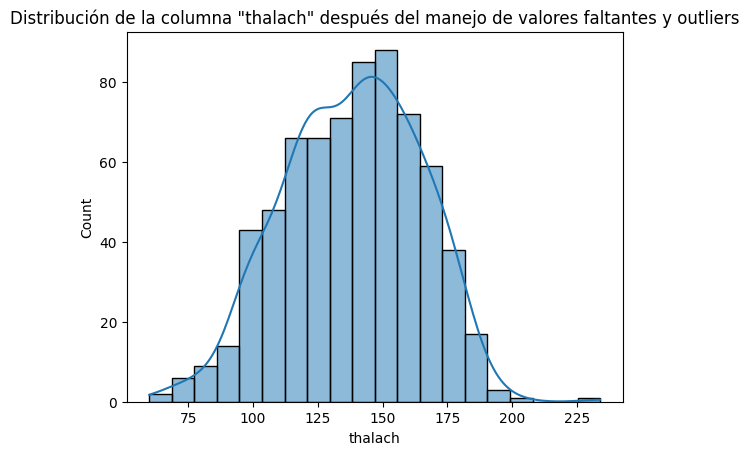

0      125.0
1      150.0
2      149.0
3      140.0
4      111.0
       ...  
684    178.0
685    150.0
686    165.0
687    132.0
688    163.0
Name: thalach, Length: 689, dtype: float64

In [55]:
train_copy_b['thalach'].replace(0, np.nan, inplace=True)
# Step 1: Calculate the average 'chol' for each combination of age and gender
average_thalach = train_copy_b.groupby(['age', 'sex'])['thalach'].median()
# Step 2: Fill in the missing values in the 'chol' column with the corresponding average value based on age and gender
def fill_missing_thalach(row):
    if pd.isnull(row['thalach']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_thalach:
            return average_thalach[(age, sex)]
    return row['thalach']

train_copy_b['thalach'] = train_copy_b.apply(fill_missing_thalach, axis=1)

#print(train_copy_b[train_copy_b['chol'].isnull()])
print(train_copy_b['thalach'] .isnull().sum())
print(train_copy_b['thalach'].mean())


# Print the distribution of the 'trestbps' column after handling missing values
sns.histplot(train_copy_b['thalach'].dropna(), kde=True)
plt.title('Distribución de la columna "thalach" después del manejo de valores faltantes y outliers')
plt.show()
train_copy_b['thalach'] = train_copy_b['thalach'].fillna(np.nan).astype(float)

train_copy_b['thalach']

### Conclusión

Después de realizar la imputación y el manejo de outliers en la columna "thalach", observamos lo que el reparto se puede considerar casi normal, pero en su parte izquierda hay muchos valores alrededor de 120 y 125, por lo que se observa un ligero pico, valor mean = 138

0
138.27140783744557


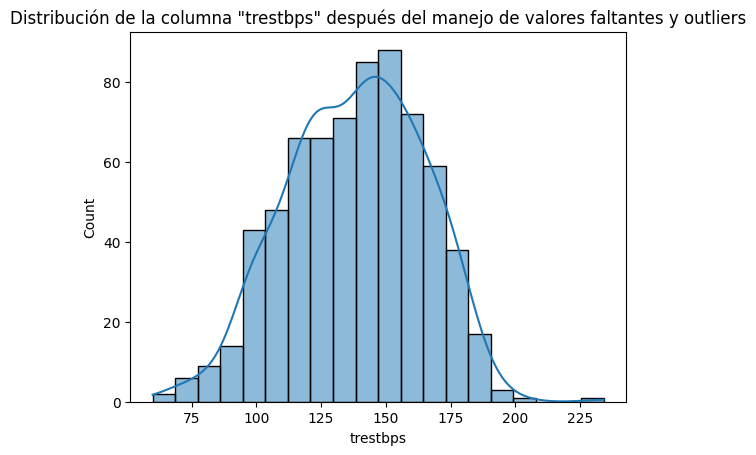

0      125.0
1      150.0
2      149.0
3      140.0
4      111.0
       ...  
684    178.0
685    150.0
686    165.0
687    132.0
688    163.0
Name: trestbps, Length: 689, dtype: float64

In [57]:
train_copy_b['trestbps'].replace(0, np.nan, inplace=True)
# Step 1: Calculate the average 'chol' for each combination of age and gender
average_trestbps = train_copy_b.groupby(['age', 'sex'])['trestbps'].median()
# Step 2: Fill in the missing values in the 'chol' column with the corresponding average value based on age and gender
def fill_missing_trestbps(row):
    if pd.isnull(row['trestbps']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_trestbps:
            return average_trestbps[(age, sex)]
    return row['trestbps']

train_copy_b['trestbps'] = train_copy_b.apply(fill_missing_trestbps, axis=1)


print(train_copy_b['trestbps'] .isnull().sum())
print(train_copy_b['trestbps'].mean())


# Print the distribution of the 'trestbps' column after handling missing values
sns.histplot(train_copy_b['trestbps'].dropna(), kde=True)
plt.title('Distribución de la columna "trestbps" después del manejo de valores faltantes y outliers')
plt.show()


train_copy_b['trestbps']


### Conclusión

Después de realizar la imputación y el manejo de outliers en la columna "thalach", observamos lo que el reparto se puede considerar casi normal, pero en su parte izquierda hay muchos valores alrededor de 120 y 125, por lo que se observa un ligero pico, valor mean = 138

0
0.0


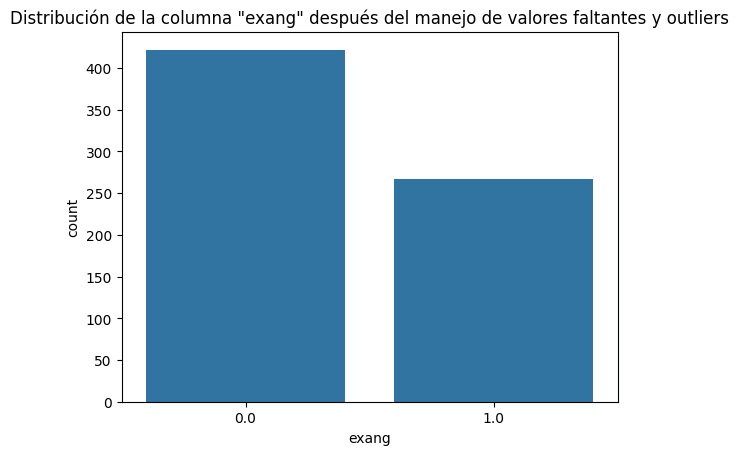

0      1
1      1
2      0
3      0
4      1
      ..
684    0
685    0
686    0
687    0
688    0
Name: exang, Length: 689, dtype: int64

In [58]:
# Step 1: Group by 'cp' and 'restecg' and get the mode of 'exang'
mode_exang_by_cp_restecg = train_copy_b.groupby(['cp', 'restecg'])['exang'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Step 2: Fill in missing values in 'exang' based on the mode for the corresponding 'cp' and 'restecg' combination
def fill_missing_exang(row):
    if pd.isnull(row['exang']):
        cp = row['cp']
        restecg = row['restecg']
        if (cp, restecg) in mode_exang_by_cp_restecg:
            return mode_exang_by_cp_restecg[(cp, restecg)]
    return row['exang']

train_copy_b['exang'] = train_copy_b.apply(fill_missing_exang, axis=1)

#print(train_copy_b[train_copy_b['chol'].isnull()])
print(train_copy_b['exang'] .isnull().sum())
print(train_copy_b['exang'].median())

# Print the distribution of the 'trestbps' column after handling missing values
# Create a bar chart of the exang distribution
sns.countplot(x='exang', data=train_copy_b)
plt.title('Distribución de la columna "exang" después del manejo de valores faltantes y outliers')
plt.show()

train_copy_b['exang'] = train_copy_b['exang'].fillna(np.nan).astype('int64')
train_copy_b['exang']

### Conclusión

Después de realizar la imputación y el manejo de outliers en la columna "exang", observamos lo que el tenemos valores double más que 1

0
0.0


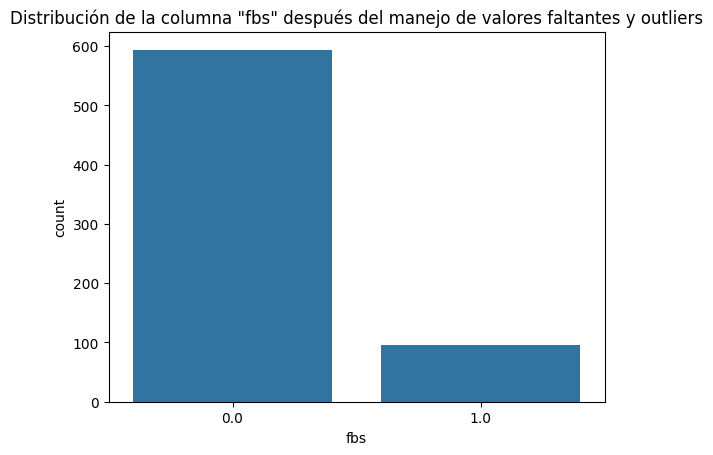

0      0
1      0
2      0
3      0
4      0
      ..
684    1
685    0
686    0
687    1
688    0
Name: fbs, Length: 689, dtype: Int64

In [59]:
# Step 1: Group by 'cp' and 'age' and get the mode of 'fbs'
mode_fbs_by_cp_age = train_copy_b.groupby(['cp','exang'])['fbs'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Step 2: Fill in missing values in 'fbs' based on the mode for the corresponding 'cp' and 'age' combination
def fill_missing_fbs(row):
    if pd.isnull(row['fbs']):
        cp = row['cp']
        exang = row['exang']
        if (cp, exang) in mode_fbs_by_cp_age:
            return mode_fbs_by_cp_age[(cp, exang)]
    return row['fbs']

train_copy_b['fbs'] = train_copy_b.apply(fill_missing_fbs, axis=1)

#print(train_copy_b[train_copy_b['chol'].isnull()])
print(train_copy_b['fbs'] .isnull().sum())
print(train_copy_b['fbs'].median())


# Create a bar chart of the exang distribution
sns.countplot(x='fbs', data=train_copy_b)
plt.title('Distribución de la columna "fbs" después del manejo de valores faltantes y outliers')

plt.show()

train_copy_b['fbs'] = train_copy_b['fbs'].fillna(np.nan).astype('Int64')
train_copy_b['fbs']



### Conclusión

Después de realizar la imputación y el manejo de outliers en la columna "fbs", observamos lo que la diferencia entre los valores es seis veces. Esto puede sugerir que en la muestra predominan personas sanas.

0
0.2


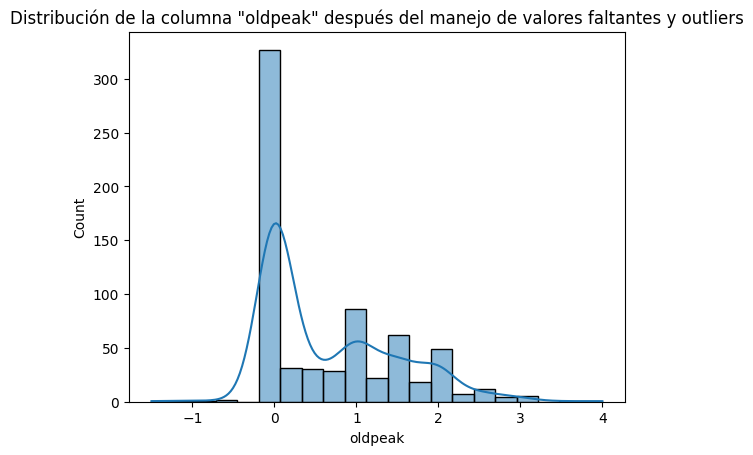

In [60]:
int_cols = ['age', 'label', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']
float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Step 1: Calculate the average 'oldpeak' for each combination of age and gender
average_oldpeak = train_copy_b.groupby(['age', 'sex'])['oldpeak'].median()

# Step 2: Fill in the missing values in the 'oldpeak' column with the corresponding average value based on age and gender
def fill_missing_oldpeak(row):
    if pd.isnull(row['oldpeak']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_oldpeak:
            return average_oldpeak[(age, sex)]
    return row['oldpeak']

# Apply the imputation function to replace missing values in 'oldpeak'
train_copy_b['oldpeak'] = train_copy_b.apply(fill_missing_oldpeak, axis=1)

# Step 3: Define a function to identify and replace outliers in 'oldpeak' with the corresponding average value
def replace_outliers_oldpeak(row):
    age = row['age']
    sex = row['sex']
    median_oldpeak = average_oldpeak.get((age, sex), np.nan)
    if not pd.isnull(median_oldpeak):
        if abs(row['oldpeak'] - median_oldpeak) > 2 * train_copy_b['oldpeak'].std():
            return median_oldpeak
    return row['oldpeak']

# Apply the function to replace outliers
train_copy_b['oldpeak'] = train_copy_b.apply(replace_outliers_oldpeak, axis=1)

# Print the number of missing values after imputation and the updated median
print(train_copy_b['oldpeak'].isnull().sum())
print(train_copy_b['oldpeak'].median())

# Print the distribution of the 'oldpeak' column after handling missing values and outliers
sns.histplot(train_copy_b['oldpeak'].dropna(), kde=True)
plt.title('Distribución de la columna "oldpeak" después del manejo de valores faltantes y outliers')
plt.show()


### Conclusión

Después de realizar la imputación y el manejo de outliers en la columna "oldpeak", observamos lo que hay mucho valores "0" casi 350 y otros valore estan como media entre 50 y 100. Esto puede indicar que muchos pacientes no tienen diferencia en los valores del electrocardiograma (ST) durante el ejercicio y en reposo. Esto puede sugerir que en la muestra predominan personas sanas.

0
2.0


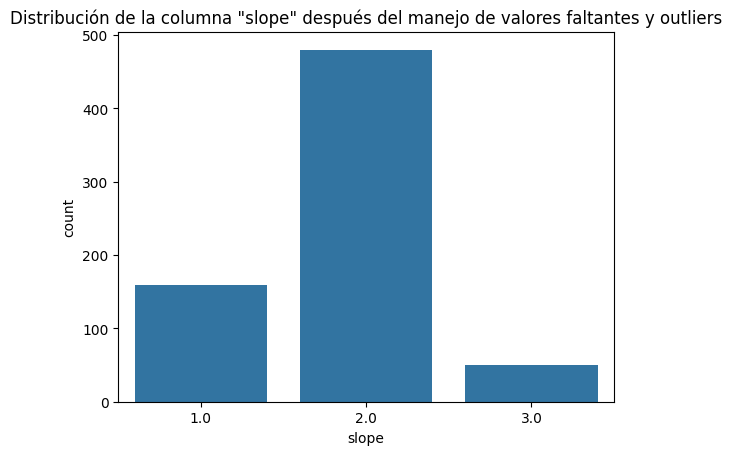

0      1
1      2
2      1
3      2
4      3
      ..
684    2
685    2
686    2
687    2
688    1
Name: slope, Length: 689, dtype: Int64

In [61]:
# Step 1: Group by 'fbs' and 'restecg' and get the mode of 'slope'
mode_slope_by_fbs_restecg = train_copy_b.groupby(['fbs', 'restecg'])['slope'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Step 2: Fill in missing values in 'slope' based on the mode for the corresponding 'fbs' and 'restecg' combination
def fill_missing_slope(row):
    if pd.isnull(row['slope']):
        fbs = row['fbs']
        restecg = row['restecg']
        if (fbs, restecg) in mode_slope_by_fbs_restecg:
            return mode_slope_by_fbs_restecg[(fbs, restecg)]
    return row['slope']

train_copy_b['slope'] = train_copy_b.apply(fill_missing_slope, axis=1)


print(train_copy_b['slope'] .isnull().sum())
print(train_copy_b['slope'].median())



# Create a bar chart of the exang distribution
sns.countplot(x='slope', data=train_copy_b)
plt.title('Distribución de la columna "slope" después del manejo de valores faltantes y outliers')
plt.show()

train_copy_b['slope'] = train_copy_b['slope'].fillna(np.nan).astype('Int64')
train_copy_b['slope']


In [25]:
# Step 1: Calculate the mode 'ca' for each combination of cp and restecg
mode_ca_by_cp_restecg = train_copy_b.groupby(['cp', 'restecg'])['ca'].apply(lambda x: x.median(skipna=True))

# Step 2: Fill in the missing values in the 'ca' column with the corresponding mode value based on cp and restecg
def fill_missing_ca(row):
    if pd.isnull(row['ca']):
        cp = row['cp']
        restecg = row['restecg']
        if (cp, restecg) in mode_ca_by_cp_restecg:
            return mode_ca_by_cp_restecg[(cp, restecg)]
    return row['ca']

# Llena los valores NaN en 'ca' con NaN y convierte la columna a 'Int64'
train_copy_b['ca'] = train_copy_b['ca'].fillna(np.nan).astype('Int64')
train_copy_b['ca'] = train_copy_b['ca'].fillna(0).astype('Int64')
train_copy_b['ca']
mode_ca_by_cp_restecg

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


cp  restecg
1   0           0.0
    1          <NA>
    2           0.0
2   0           0.0
    1          <NA>
    2           0.0
3   0           0.0
    1           0.0
    2           0.0
4   0           1.0
    1           1.0
    2           1.0
Name: ca, dtype: object


### Conclusión

Después de realizar la imputación y el manejo de outliers en la columna "oldpeak", podría indicar que la mayoría de los pacientes tienen un valor de pendiente (slope) igual a 2, lo que podría indicar personas más saludables en la muestra. También es importante tener en cuenta que hay un pequeño número de personas con un valor de 3.

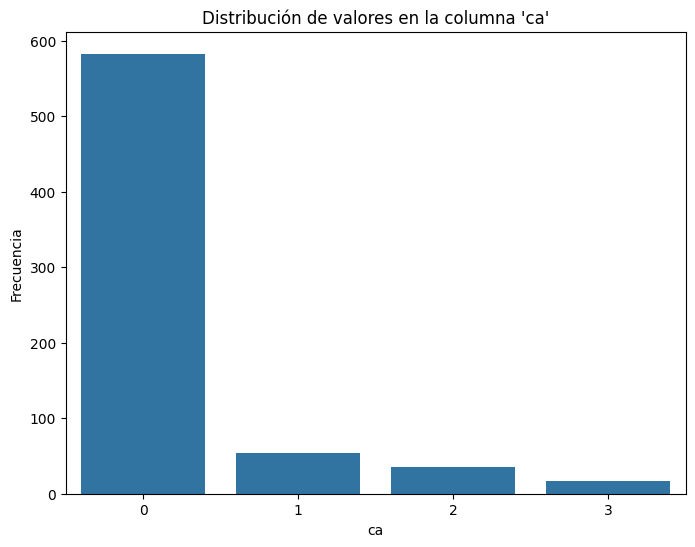

In [26]:
# Reemplazar los valores NA en 'thal' con -1
train_copy_b['thal_filled'] = train_copy_b['ca'].fillna(-1)

# Graficar la distribución de valores en la columna 'thal'
plt.figure(figsize=(8, 6))
sns.countplot(x='ca', data=train_copy_b)
plt.title("Distribución de valores en la columna 'ca'")
plt.xlabel("ca")
plt.ylabel("Frecuencia")
plt.show()



### Conclusión

Después de analizar la columna "ca", podría indicar que la mayoría de los pacientes tienen un valor CA igual a 0, lo que podría indicar personas más saludables en la muestra.

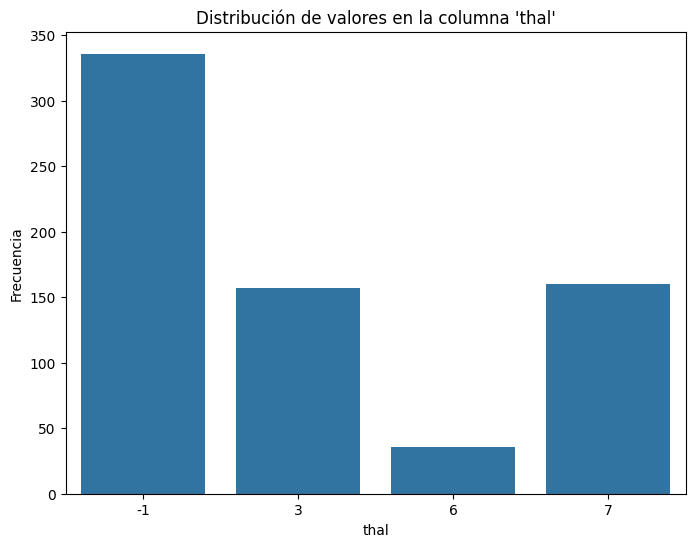

In [27]:
# Reemplazar los valores NA en 'thal' con -1
train_copy_b['thal_filled'] = train_copy_b['thal'].fillna(-1)

# Graficar la distribución de valores en la columna 'thal'
plt.figure(figsize=(8, 6))
sns.countplot(x='thal_filled', data=train_copy_b)
plt.title("Distribución de valores en la columna 'thal'")
plt.xlabel("thal")
plt.ylabel("Frecuencia")
plt.show()



In [28]:
# Step 1: Calculate the mode 'thal' for each combination of 'cp' y 'restecg'
mode_thal_by_cp_restecg = train_copy_b.groupby(['restecg','cp'])['thal'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Step 2: Fill in the missing values in the 'thal' column with the corresponding mode value based on 'cp' y 'restecg'
def fill_missing_thal(row):
    if pd.isnull(row['thal']):
        cp = row['cp']
        restecg = row['restecg']
        if (cp, restecg) in mode_thal_by_cp_restecg:
            return mode_thal_by_cp_restecg[(cp, restecg)]
    return row['thal']

print(train_copy_b['thal'].isnull().sum())
print(train_copy_b['thal'].median())

train_copy_b['thal'] = train_copy_b['thal'].fillna(3).astype('Int64')
train_copy_b['thal']

mode_thal_by_cp_restecg


336
6.0


restecg  cp
0        1     3.0
         2     3.0
         3     3.0
         4     7.0
1        1     6.0
         2     NaN
         3     3.0
         4     7.0
2        1     3.0
         2     3.0
         3     3.0
         4     7.0
Name: thal, dtype: float64

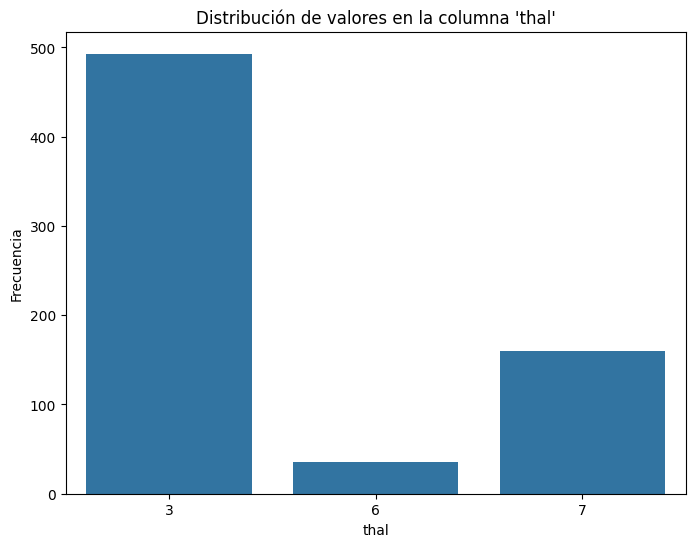

In [29]:
# Reemplazar los valores NA en 'thal' con -1
train_copy_b['thal_filled'] = train_copy_b['thal'].fillna(-1)

# Graficar la distribución de valores en la columna 'thal'
plt.figure(figsize=(8, 6))
sns.countplot(x='thal_filled', data=train_copy_b)
plt.title("Distribución de valores en la columna 'thal'")
plt.xlabel("thal")
plt.ylabel("Frecuencia")
plt.show()

### Conclusión

Después de analizar la columna "thal", podría indicar que la mayoría de los pacientes tienen un valor THAL igual a 3, lo que podría indicar personas más saludables en la muestra.

In [30]:
print(train_copy_b.isnull().sum())


age            0
sex            0
cp             0
trestbps       0
chol           2
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
label          0
thal_filled    0
dtype: int64


##### **Opcion 3** - KNN (K-Nearest Neighbors): imputa los valores faltantes utilizando los valores de las observaciones más similares en función de otras variables. Calcula los vecinos más cercanos y usar sus valores para imputar los valores faltantes. Se aplica solo a variables float

In [31]:
train_copy_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          689 non-null    Int64  
 1   sex          689 non-null    Int64  
 2   cp           689 non-null    Int64  
 3   trestbps     689 non-null    float64
 4   chol         687 non-null    float64
 5   fbs          689 non-null    Int64  
 6   restecg      689 non-null    Int64  
 7   thalach      689 non-null    float64
 8   exang        689 non-null    int64  
 9   oldpeak      689 non-null    float64
 10  slope        689 non-null    Int64  
 11  ca           689 non-null    Int64  
 12  thal         689 non-null    Int64  
 13  label        689 non-null    Int64  
 14  thal_filled  689 non-null    Int64  
dtypes: Int64(10), float64(4), int64(1)
memory usage: 87.6 KB


In [32]:
train_copy_knn =  train_copy_b.copy()

# Imputar valores faltantes para variables float
numeric_imputer = KNNImputer()
numeric_imputed_data = numeric_imputer.fit_transform(train_copy_knn[float_cols])
numeric_imputed_df = pd.DataFrame(numeric_imputed_data, columns=float_cols, index=train_copy_knn.index)

# Imputar valores faltantes con la moda para variables int
categorical_imputed_df = train_copy_knn[int_cols].fillna(train_copy_knn[int_cols].mode().iloc[0])

# Combinar las variables float y int imputadas
train_copy_knn = pd.concat([numeric_imputed_df, categorical_imputed_df], axis=1)

# Verificar si hay valores faltantes después de la imputación
# Check for missing values
train_copy_knn = train_copy_knn[train.columns]

# Imprimir el DataFrame original train_copy_b

train_copy_knn


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0,2,125.0,1,1.40,1,1,3,0
1,54,1,3,150.0,237.0,0,0,150.0,1,1.50,2,0,7,2
2,63,1,4,149.0,254.0,0,2,149.0,0,2.00,1,0,3,2
3,52,0,2,140.0,203.0,0,0,140.0,0,0.00,2,0,3,0
4,55,1,4,111.0,217.0,0,0,111.0,1,0.25,3,0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,52,1,1,178.0,298.0,1,0,178.0,0,1.20,2,0,7,0
685,46,1,3,150.0,230.0,0,0,150.0,0,0.00,2,0,3,0
686,43,0,3,165.0,213.0,0,0,165.0,0,0.20,2,0,3,0
687,68,1,3,132.0,195.0,1,0,132.0,0,0.00,2,0,6,1


##### ***Conversion de variables categoricas a dummies*** 

In [33]:
train_copy_knn


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0,2,125.0,1,1.40,1,1,3,0
1,54,1,3,150.0,237.0,0,0,150.0,1,1.50,2,0,7,2
2,63,1,4,149.0,254.0,0,2,149.0,0,2.00,1,0,3,2
3,52,0,2,140.0,203.0,0,0,140.0,0,0.00,2,0,3,0
4,55,1,4,111.0,217.0,0,0,111.0,1,0.25,3,0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,52,1,1,178.0,298.0,1,0,178.0,0,1.20,2,0,7,0
685,46,1,3,150.0,230.0,0,0,150.0,0,0.00,2,0,3,0
686,43,0,3,165.0,213.0,0,0,165.0,0,0.20,2,0,3,0
687,68,1,3,132.0,195.0,1,0,132.0,0,0.00,2,0,6,1


In [34]:
int_cols_to_dummy = ['cp', 'restecg', 'ca', 'slope', 'thal']
train_copy_b[int_cols_to_dummy]= train_copy_b[int_cols_to_dummy].astype('int64')

#Convierto variables seleccionadas a dummy
df_dummy = pd.get_dummies(train_copy_b, columns=['cp', 'restecg', 'ca', 'slope', 'thal'], dtype=int)

# Elimino la el valor de referencia (resultado normal) para evitar colinealidad
df_dummy.drop('cp_4', axis=1, inplace=True)
df_dummy.drop('restecg_2', axis=1, inplace=True)
df_dummy.drop('ca_3', axis=1, inplace=True)
df_dummy.drop('slope_3', axis=1, inplace=True)
df_dummy.drop('thal_7', axis=1, inplace=True)

#df_dummy.drop('thalach', axis=1, inplace=True)############
#df_dummy.drop('trestbps', axis=1, inplace=True)############
#df_dummy.drop('oldpeak', axis=1, inplace=True)############


df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          689 non-null    Int64  
 1   sex          689 non-null    Int64  
 2   trestbps     689 non-null    float64
 3   chol         687 non-null    float64
 4   fbs          689 non-null    Int64  
 5   thalach      689 non-null    float64
 6   exang        689 non-null    int64  
 7   oldpeak      689 non-null    float64
 8   label        689 non-null    Int64  
 9   thal_filled  689 non-null    Int64  
 10  cp_1         689 non-null    int64  
 11  cp_2         689 non-null    int64  
 12  cp_3         689 non-null    int64  
 13  restecg_0    689 non-null    int64  
 14  restecg_1    689 non-null    int64  
 15  ca_0         689 non-null    int64  
 16  ca_1         689 non-null    int64  
 17  ca_2         689 non-null    int64  
 18  slope_1      689 non-null    int64  
 19  slope_2 

In [35]:
df_dummy

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,label,thal_filled,...,cp_3,restecg_0,restecg_1,ca_0,ca_1,ca_2,slope_1,slope_2,thal_3,thal_6
0,51,1,125.0,213.0,0,125.0,1,1.40,0,3,...,0,0,0,0,1,0,1,0,1,0
1,54,1,150.0,237.0,0,150.0,1,1.50,2,7,...,1,1,0,1,0,0,0,1,0,0
2,63,1,149.0,254.0,0,149.0,0,2.00,2,3,...,0,0,0,1,0,0,1,0,1,0
3,52,0,140.0,203.0,0,140.0,0,0.00,0,3,...,0,1,0,1,0,0,0,1,1,0
4,55,1,111.0,217.0,0,111.0,1,0.25,3,7,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,52,1,178.0,298.0,1,178.0,0,1.20,0,7,...,0,1,0,1,0,0,0,1,0,0
685,46,1,150.0,230.0,0,150.0,0,0.00,0,3,...,1,1,0,1,0,0,0,1,1,0
686,43,0,165.0,213.0,0,165.0,0,0.20,0,3,...,1,1,0,1,0,0,0,1,1,0
687,68,1,132.0,195.0,1,132.0,0,0.00,1,6,...,1,1,0,1,0,0,0,1,0,1


#### Graficos de distribución

In [36]:
print(df_dummy.describe())

             age       sex    trestbps        chol       fbs     thalach  \
count      689.0     689.0  689.000000  687.000000     689.0  689.000000   
mean   53.007257  0.777939  138.271408  242.088792  0.137881  138.271408   
std     9.274791  0.415934   26.200375   41.759980  0.345026   26.200375   
min         28.0       0.0   60.000000  129.000000       0.0   60.000000   
25%         46.0       1.0  120.000000  216.000000       0.0  120.000000   
50%         54.0       1.0  140.000000  237.000000       0.0  140.000000   
75%         59.0       1.0  159.000000  266.000000       0.0  159.000000   
max         76.0       1.0  234.000000  417.000000       1.0  234.000000   

            exang     oldpeak     label  thal_filled  ...        cp_3  \
count  689.000000  689.000000     689.0        689.0  ...  689.000000   
mean     0.387518    0.740566   1.11611     4.085631  ...    0.220610   
std      0.487538    0.909869  1.252156     1.735382  ...    0.414959   
min      0.000000   -1.

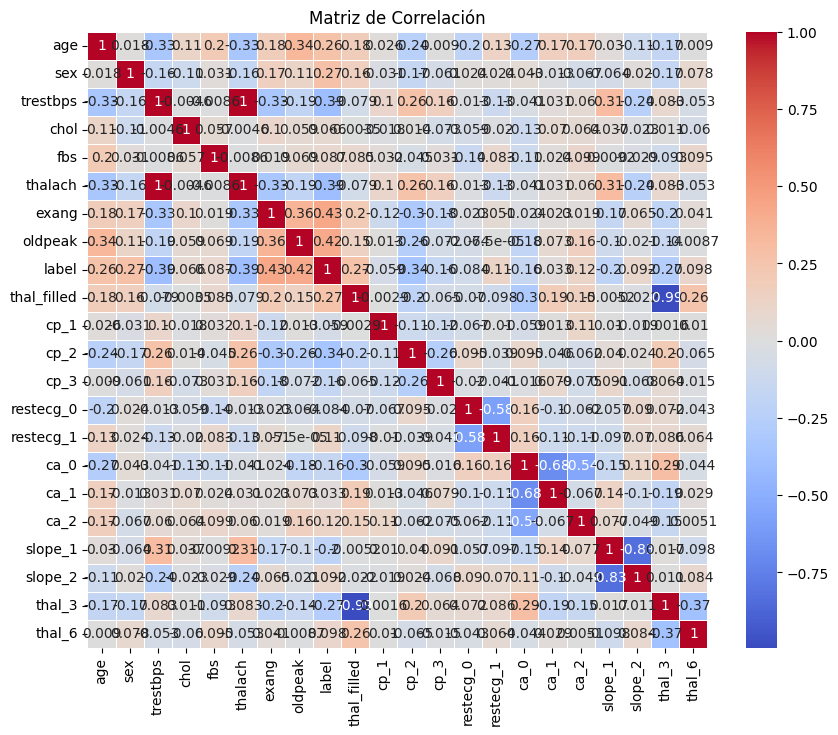

In [37]:
# Calcular la matriz de correlación
correlation_matrix = df_dummy.corr()

# Definir el umbral de correlación
threshold = 0

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, 
            mask=np.abs(correlation_matrix) <= threshold)  # Solo muestra las celdas con correlación mayor que el umbral
plt.title('Matriz de Correlación')

# Mostrar el mapa de calor
plt.show()

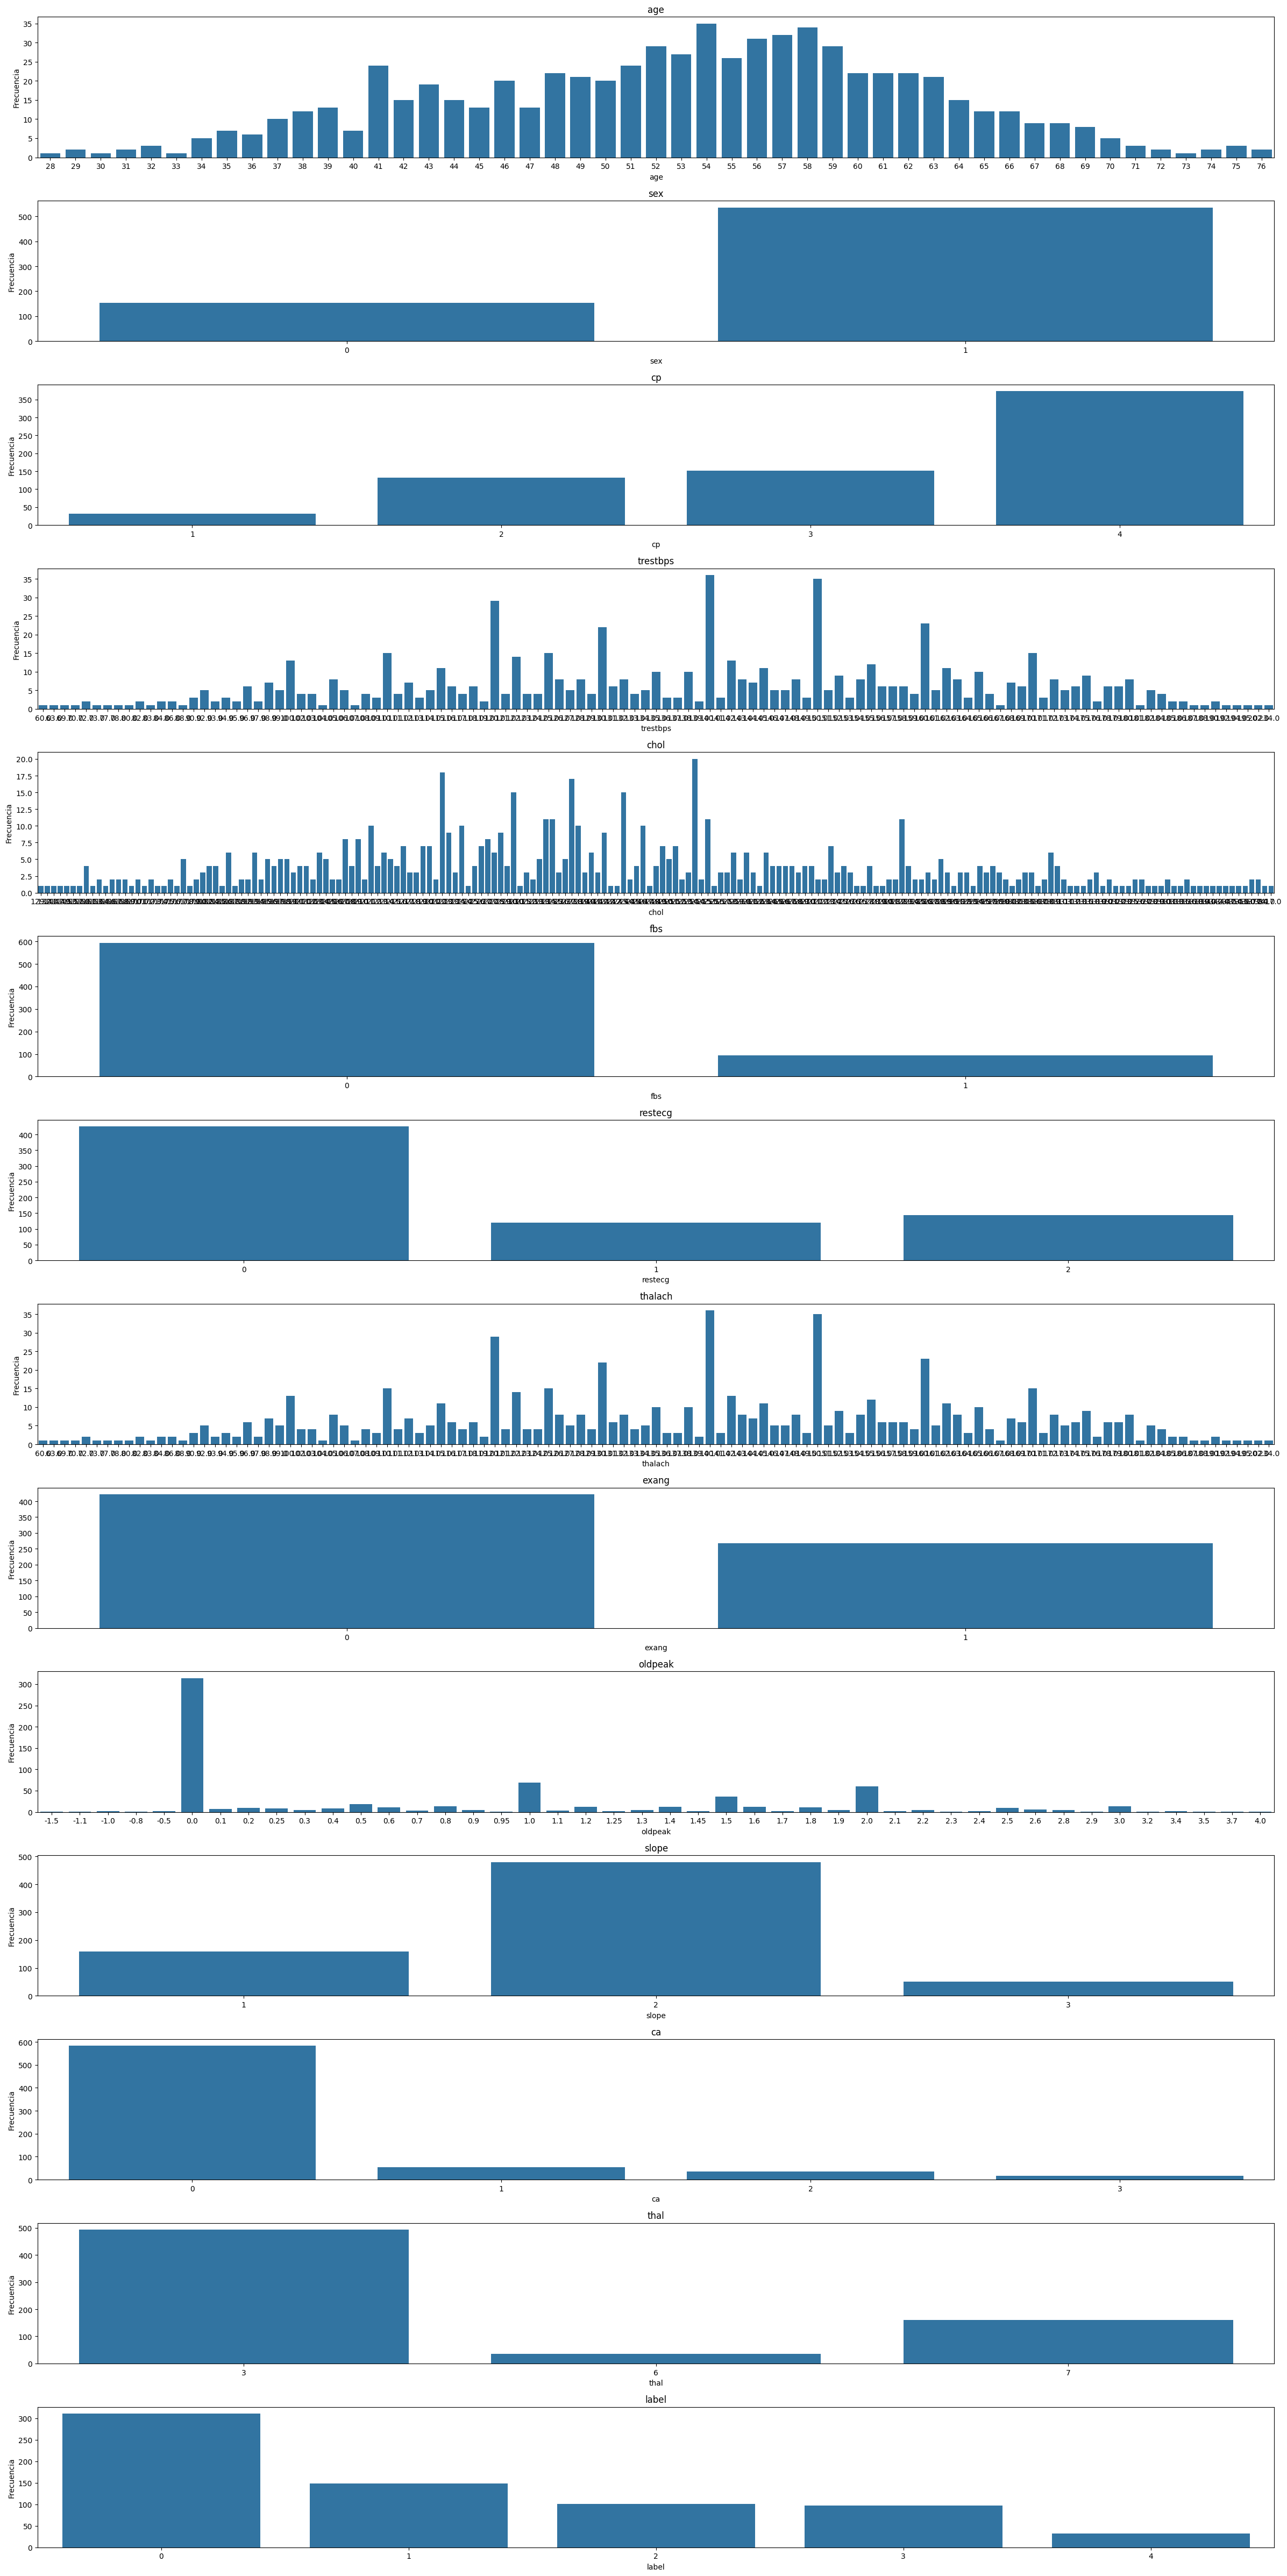

In [38]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label']

# Subgráficos
num_cols = 1
num_rows = int(np.ceil(len(cols) / num_cols))

# Crear subplots para cada variable 
plt.figure(figsize=(24, 48))
for i, col in enumerate(cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=train_copy_knn, x=col)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


### B- Transformaciones dataset TEST

#### Definicion de datatypes

In [39]:
test = pd.read_csv("test.csv")
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.0,4.0,156,173,0,2,119,1,3,3,?,?
1,52.0,1.0,2.0,160.0,196.0,0.0,0.0,165.0,0.0,0.0,-9.0,-9.0,-9.0
2,48.0,1.0,2.0,100.0,-9.0,0.0,0.0,100.0,0.0,0.0,-9.0,-9.0,-9.0
3,62.0,1.0,4.0,115,0,?,0,128,1,2.5,3,?,?
4,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54.0,1.0,4.0,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,-9.0,-9.0
180,55.0,1.0,2.0,110,214,1,1,180,0,?,?,?,?
181,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0
182,59.0,1.0,1.0,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0


In [40]:
# Reemplazar '?' con NaN 
test = test.replace('?', np.nan)

# Convertir variables discretas a numericas
int_cols = ['age', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']
test[int_cols] = test[int_cols].apply(pd.to_numeric, errors='coerce')

# Convertir variables a continuas a numericas
float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
test[float_cols] = test[float_cols].apply(pd.to_numeric, errors='coerce')


# Iterar sobre las columnas numéricas y reemplazar los valores negativos por NaN, y -9 por NaN solo en 'oldpeak'
for col in int_cols + float_cols:
    if col == 'oldpeak':
        test[col] = test[col].replace(-9, np.nan)
    else:
        test[col] = test[col].apply(lambda x: np.nan if pd.isnull(x) or x < 0 else x)

# Cambio los 9 en ca por nan
test['ca'] = test['ca'].replace(9, float('nan'))


# Convertir las columnas discretas a tipo entero
test[int_cols] = test[int_cols].astype('Int64')

# Verificar la información del DataFrame
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,156.0,173.0,0,2,119.0,1,3.0,3,<NA>,<NA>
1,52,1,2,160.0,196.0,0,0,165.0,0,0.0,<NA>,<NA>,<NA>
2,48,1,2,100.0,NaN,0,0,100.0,0,0.0,<NA>,<NA>,<NA>
3,62,1,4,115.0,0.0,<NA>,0,128.0,1,2.5,3,<NA>,<NA>
4,51,1,3,110.0,175.0,0,0,123.0,0,0.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1,4,200.0,198.0,0,0,142.0,1,2.0,2,<NA>,<NA>
180,55,1,2,110.0,214.0,1,1,180.0,0,NaN,<NA>,<NA>,<NA>
181,67,1,3,152.0,212.0,0,2,150.0,0,0.8,2,0,7
182,59,1,1,170.0,288.0,0,2,159.0,0,0.2,2,0,7


#### Reemplazo de valores missing

##### Reemplazo de ***valores faltantes*** para cada variable en particular utilizanndo agrupaciones con otras variebles


In [41]:
#Copia del df
test_copy_a =  test.copy()


test_copy_a['chol'].replace(0, np.nan, inplace=True)

# Step 5: Calculate the average 'chol' for each combination of age and gender
average_chol = test_copy_a.groupby(['age', 'sex'])['chol'].mean()


# Fill in the missing values in the 'chol' column with the corresponding average value based on age and gender
def fill_missing_chol(row):
    if pd.isnull(row['chol']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_chol:
            return average_chol[(age, sex)]
    return row['chol']

test_copy_a['chol'] = test_copy_a.apply(fill_missing_chol, axis=1)


#---------------------------

test_copy_a['thalach'].replace(0, np.nan, inplace=True)
# Step 6: Calculate the average 'chol' for each combination of age and gender
average_thalach = test_copy_a.groupby(['age', 'sex'])['thalach'].median()
# Fill in the missing values in the 'chol' column with the corresponding average value based on age and gender
def fill_missing_thalach(row):
    if pd.isnull(row['thalach']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_thalach:
            return average_chol[(age, sex)]
    return row['thalach']

test_copy_a['thalach'] = test_copy_a.apply(fill_missing_thalach, axis=1)

#---------------------------


test_copy_a['trestbps'].replace(0, np.nan, inplace=True)
# Step 7: Calculate the average 'chol' for each combination of age and gender
average_trestbps = test_copy_a.groupby(['age', 'sex'])['trestbps'].median()
#Fill in the missing values in the 'chol' column with the corresponding average value based on age and gender
def fill_missing_trestbps(row):
    if pd.isnull(row['trestbps']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_trestbps:
            return average_chol[(age, sex)]
    return row['trestbps']

test_copy_a['trestbps'] = test_copy_a.apply(fill_missing_thalach, axis=1)

#---------------------------


# Step 9: Group by 'cp' and 'restecg' and get the mode of 'exang'
mode_exang_by_cp_restecg = test_copy_a.groupby(['cp', 'restecg'])['exang'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Fill in missing values in 'exang' based on the mode for the corresponding 'cp' and 'restecg' combination
def fill_missing_exang(row):
    if pd.isnull(row['exang']):
        cp = row['cp']
        restecg = row['restecg']
        if (cp, restecg) in mode_exang_by_cp_restecg:
            return mode_exang_by_cp_restecg[(cp, restecg)]
    return row['exang']

test_copy_a['exang'] = test_copy_a.apply(fill_missing_exang, axis=1)

#---------------------------


# Step 4: Group by 'cp' and 'age' and get the mode of 'fbs'
mode_fbs_by_cp_age = test_copy_a.groupby(['cp','exang'])['fbs'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Fill in missing values in 'fbs' based on the mode for the corresponding 'cp' and 'age' combination
def fill_missing_fbs(row):
    if pd.isnull(row['fbs']):
        cp = row['cp']
        exang = row['exang']
        if (cp, exang) in mode_fbs_by_cp_age:
            return mode_fbs_by_cp_age[(cp, exang)]
    return row['fbs']


test_copy_a['fbs'] = test_copy_a.apply(fill_missing_fbs, axis=1)


#---------------------------

# Step 8: Calculate the average 'oldpeak' for each combination of age and gender
average_oldpeak = test_copy_a.groupby(['age', 'sex'])['oldpeak'].median()

# Fill in the missing values in the 'oldpeak' column with the corresponding average value based on age and gender
def fill_missing_oldpeak(row):
    if pd.isnull(row['oldpeak']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_oldpeak:
            return average_oldpeak[(age, sex)]
    return row['oldpeak']

test_copy_a['oldpeak'] = test_copy_a.apply(fill_missing_oldpeak, axis=1)



#---------------------------

mode_slope_by_cp_restecg = test_copy_a.groupby(['age', 'restecg'])['slope'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)


# Step 3: Fill in missing values in 'slope' based on the mode for the corresponding 'cp' and 'restecg' combination
def fill_missing_slope(row):
    if pd.isnull(row['slope']):
        age = row['age']
        restecg = row['restecg']
        if (age, restecg) in mode_slope_by_cp_restecg:
            return mode_slope_by_cp_restecg[(age, restecg)]
    return row['slope']

test_copy_a['slope'] = test_copy_a.apply(fill_missing_slope, axis=1)

#---------------------------


# Step 1: Calculate the mode 'ca' for each age
mode_ca_by_sex_cp = test_copy_a.groupby(['sex', 'cp'])['ca'].median()

# Step 2: Fill in the missing values in the 'ca' column with the corresponding mode value based on age
def fill_missing_ca(row):
    if pd.isnull(row['ca']):
        sex = row['sex']
        cp = row['cp']
        if (sex, cp) in mode_ca_by_sex_cp:
            return mode_ca_by_sex_cp[(sex, cp)]
    return row['ca']


test_copy_a['ca'] = test_copy_a.apply(fill_missing_ca, axis=1)




#---------------------------

# Step 2: Calculate the mode 'thal' for each age
mode_thal_by_age = test_copy_a.groupby(['cp', 'restecg'])['thal'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

def fill_missing_thal(row):
    if pd.isnull(row['thal']):
        cp = row['cp']
        restecg = row['restecg']
        if (cp, restecg) in mode_thal_by_age:
            return mode_thal_by_age[(cp, restecg)]
    return row['thal']

test_copy_a['thal'] = test_copy_a.apply(fill_missing_thal, axis=1)




test_copy_a[int_cols] = test_copy_a[int_cols].astype('Int64')
test_copy_a


/var/folders/gb/qf4chfw11j5dsg0zrngx5sy00000gn/T/ipykernel_2031/403810503.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_copy_a['chol'].replace(0, np.nan, inplace=True)
/var/folders/gb/qf4chfw11j5dsg0zrngx5sy00000gn/T/ipykernel_2031/403810503.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,119.0,173.0,0,2,119.0,1,3.0,3,1,7
1,52,1,2,165.0,196.0,0,0,165.0,0,0.0,2,0,7
2,48,1,2,100.0,238.0,0,0,100.0,0,0.0,2,0,7
3,62,1,4,128.0,237.2,0,0,128.0,1,2.5,3,1,3
4,51,1,3,123.0,175.0,0,0,123.0,0,0.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1,4,142.0,198.0,0,0,142.0,1,2.0,2,1,3
180,55,1,2,180.0,214.0,1,1,180.0,0,0.8,1,0,<NA>
181,67,1,3,150.0,212.0,0,2,150.0,0,0.8,2,0,7
182,59,1,1,159.0,288.0,0,2,159.0,0,0.2,2,0,7


##### KNN (K-Nearest Neighbors)

In [42]:
# Copia del dataframe
test_copy_b = test_copy_a.copy()

# Reemplazar valores cero con NaN
test_copy_b[float_cols] = test_copy_b[float_cols].replace(0, float('nan'))

# Imputar valores faltantes utilizando KNNImputer
numeric_imputer = KNNImputer()
numeric_imputed_data = numeric_imputer.fit_transform(test_copy_b[float_cols])
numeric_imputed_df = pd.DataFrame(numeric_imputed_data, columns=float_cols)

# Imputar valores faltantes con la moda para variables int
categorical_imputed_df = test_copy_b[int_cols].fillna(test_copy_b.mode().iloc[0])

# Combinar las variables float y int imputadas
test_copy_b = pd.concat([numeric_imputed_df, categorical_imputed_df], axis=1)

# Verificar si hay valores faltantes después de la imputación
test_copy_b = test_copy_b[test.columns]
test_copy_b


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,119.0,173.0,0,2,119.0,1,3.00,3,1,7
1,52,1,2,165.0,196.0,0,0,165.0,0,1.02,2,0,7
2,48,1,2,100.0,238.0,0,0,100.0,0,1.50,2,0,7
3,62,1,4,128.0,237.2,0,0,128.0,1,2.50,3,1,3
4,51,1,3,123.0,175.0,0,0,123.0,0,0.60,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1,4,142.0,198.0,0,0,142.0,1,2.00,2,1,3
180,55,1,2,180.0,214.0,1,1,180.0,0,0.80,1,0,3
181,67,1,3,150.0,212.0,0,2,150.0,0,0.80,2,0,7
182,59,1,1,159.0,288.0,0,2,159.0,0,0.20,2,0,7


##### Convirtiendo catecoricas ordinales a dummy

In [43]:
# Convierto variables seleccionadas a dummy 
test_copy_dummy_d = pd.get_dummies(test_copy_a, columns=['cp', 'restecg', 'ca', 'slope', 'thal'], dtype=int)


# Elimino la el valor de referencia (resultado normal) para evitar colinealidad
test_copy_dummy_d.drop('cp_4', axis=1, inplace=True)
test_copy_dummy_d.drop('restecg_2', axis=1, inplace=True)
test_copy_dummy_d.drop('ca_3', axis=1, inplace=True)
test_copy_dummy_d.drop('slope_3', axis=1, inplace=True)
test_copy_dummy_d.drop('thal_7', axis=1, inplace=True)

#Eso es interesante
# test_copy_dummy_d.drop('thalach', axis=1, inplace=True)
#test_copy_dummy_d.drop('trestbps', axis=1, inplace=True)
#test_copy_dummy_d.drop('oldpeak', axis=1, inplace=True)

test_copy_dummy_d

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,cp_3,restecg_0,restecg_1,ca_0,ca_1,ca_2,slope_1,slope_2,thal_3,thal_6
0,57,1,119.0,173.0,0,119.0,1,3.0,0,0,0,0,0,0,1,0,0,0,0,0
1,52,1,165.0,196.0,0,165.0,0,0.0,0,1,0,1,0,1,0,0,0,1,0,0
2,48,1,100.0,238.0,0,100.0,0,0.0,0,1,0,1,0,1,0,0,0,1,0,0
3,62,1,128.0,237.2,0,128.0,1,2.5,0,0,0,1,0,0,1,0,0,0,1,0
4,51,1,123.0,175.0,0,123.0,0,0.6,0,0,1,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1,142.0,198.0,0,142.0,1,2.0,0,0,0,1,0,0,1,0,0,1,1,0
180,55,1,180.0,214.0,1,180.0,0,0.8,0,1,0,0,1,1,0,0,1,0,0,0
181,67,1,150.0,212.0,0,150.0,0,0.8,0,0,1,0,0,1,0,0,0,1,0,0
182,59,1,159.0,288.0,0,159.0,0,0.2,1,0,0,0,0,1,0,0,0,1,0,0


## 3 - Entrenamiento del Modelo

### Evaluacion de modelos

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression


# Identificar las filas con valores negativos
#valores_negativos = (train < 0).any(axis=1)

#Eliminar las filas con valores negativos
#train = train[~valores_negativos]

#Seleccion del df para entrenar al modelo
df_train = train_copy_knn
##########################################################################


# Separacion entre Label y las variables independientes
X = df_train.drop('label', axis=1)  # Variables independientes
y = df_train['label']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    LogisticRegression()
]

# Entrenar y evaluar cada modelo
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}, MSE: {mse}, R2: {r2}")

Model: LinearRegression, MSE: 0.8516792361148341, R2: 0.3740833028761278
Model: Ridge, MSE: 0.8519785276794326, R2: 0.3738633473111136
Model: Lasso, MSE: 1.0987843346761494, R2: 0.19248065181288976
Model: DecisionTreeRegressor, MSE: 2.391304347826087, R2: -0.7574190560722416
Model: RandomForestRegressor, MSE: 1.0075115942028985, R2: 0.25955887778335207
Model: LogisticRegression, MSE: 1.3985507246376812, R2: -0.02782387218770488


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Entrenamiento con ***logistic regression***

In [45]:
df_train = df_dummy
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          689 non-null    Int64  
 1   sex          689 non-null    Int64  
 2   trestbps     689 non-null    float64
 3   chol         687 non-null    float64
 4   fbs          689 non-null    Int64  
 5   thalach      689 non-null    float64
 6   exang        689 non-null    int64  
 7   oldpeak      689 non-null    float64
 8   label        689 non-null    Int64  
 9   thal_filled  689 non-null    Int64  
 10  cp_1         689 non-null    int64  
 11  cp_2         689 non-null    int64  
 12  cp_3         689 non-null    int64  
 13  restecg_0    689 non-null    int64  
 14  restecg_1    689 non-null    int64  
 15  ca_0         689 non-null    int64  
 16  ca_1         689 non-null    int64  
 17  ca_2         689 non-null    int64  
 18  slope_1      689 non-null    int64  
 19  slope_2 

#### **Seleccion** de variables con mejor ajuste


**Backward elimination** es una técnica de selección de características que iterativamente realiza entrenamientos del modelo con todas las combinaciones posibles de variables, seleccionando la combinacion con mayor performance, maximizando así su rendimiento.

In [46]:
def backward_elimination(X, y, model):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Escalar características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Inicializar el mejor conjunto de características y su precisión inicialmente
    best_features = X.columns.tolist()
    best_accuracy = 0.0
    
    # Inicializar el contador de iteraciones y el número máximo de iteraciones permitidas
    iterations = 0
    max_iterations = 500  # Número máximo de iteraciones permitidas
    
    # Iterar sobre todas las combinaciones de características y realizar backward elimination
    n_features = len(best_features)
    for k in range(n_features, 0, -1):
        for feature_comb in combinations(best_features, k):
            # Entrenar el modelo con las características seleccionadas
            accuracy = np.mean(cross_val_score(model, X_train_scaled[:, [X.columns.get_loc(col) for col in feature_comb]], y_train, cv=5))
            
            # Guardar el mejor conjunto de características y su precisión
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_features = list(feature_comb)
                
            # Verificar si se alcanzó el número máximo de iteraciones
            iterations += 1
            if iterations >= max_iterations:
                break
        if iterations >= max_iterations:
            break
        
    return best_features, best_accuracy


# Separación entre Label y las variables independientes
X = df_train.drop('label', axis=1)  # Variables independientes
y = df_train['label']  # Variable dependiente

# Inicializar el modelo de regresión logística
model = LogisticRegression()

# Ejecutar backward elimination
selected_features, best_accuracy = backward_elimination(X, y, model)

# Imprimir el mejor conjunto de características y su precisión
print("Mejor conjunto de características:", selected_features)
print("Precisión media del modelo con el mejor conjunto de características:", best_accuracy)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 141, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
               

Mejor conjunto de características: ['age', 'trestbps', 'thalach', 'exang', 'oldpeak', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'ca_0', 'slope_2', 'thal_3', 'thal_6']
Precisión media del modelo con el mejor conjunto de características: 0.5571334971334971


#### **Entrenamiento** con bucle de 1k iteraciones

El código ajusta un modelo de regresión logística a datos escalados usando un pipeline. Luego, itera 1000 veces, dividiendo los datos, ajustando el modelo y evaluando su precisión. Finalmente, visualiza y calcula la precisión media del modelo.

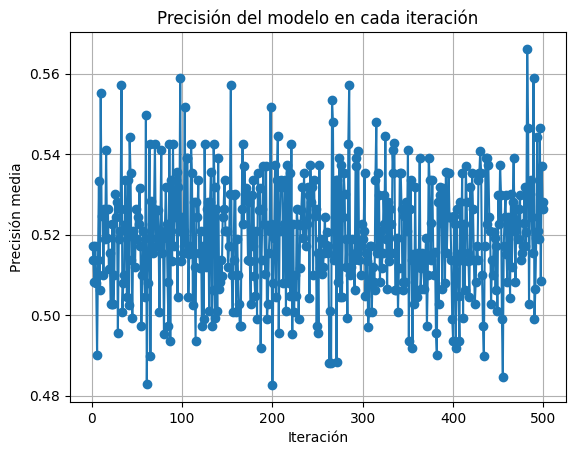

Precisión media del modelo después de todas las iteraciones: 0.5195226623376624


In [47]:

df_train = df_dummy.copy()
# Separación entre Label y las variables independientes
X = df_train[selected_features] # Variables independientes
y = df_train['label']  # Variable dependiente

# Escalar características y ajustar el modelo de regresión logística en un pipeline
scaler = StandardScaler()
model_lr = LogisticRegression(max_iter=500)

# Pipeline: Escalado de características y modelo de regresión logística
pipeline = make_pipeline(scaler, model_lr)

# Inicializar el vector para almacenar los indicadores del modelo en cada iteración
model_scores = []

# Iterar sobre 1000 iteraciones
for i in range(500):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Ajustar el modelo con los datos de entrenamiento
    pipeline.fit(X_train, y_train)

    # Calcular la precisión del modelo usando validación cruzada k-fold
    accuracy = np.mean(cross_val_score(pipeline, X_train, y_train, cv=10))
    model_scores.append(accuracy)

# Visualización de la precisión del modelo en cada iteración
plt.plot(range(1, 501), model_scores, marker='o', linestyle='-')
plt.xlabel('Iteración')
plt.ylabel('Precisión media')
plt.title('Precisión del modelo en cada iteración')
plt.grid(True)
plt.show()

# Calcular la precisión media del modelo después de todas las iteraciones
mean_accuracy = np.mean(model_scores)
print("Precisión media del modelo después de todas las iteraciones:", mean_accuracy)


#### **Evaluacion** del modelo 

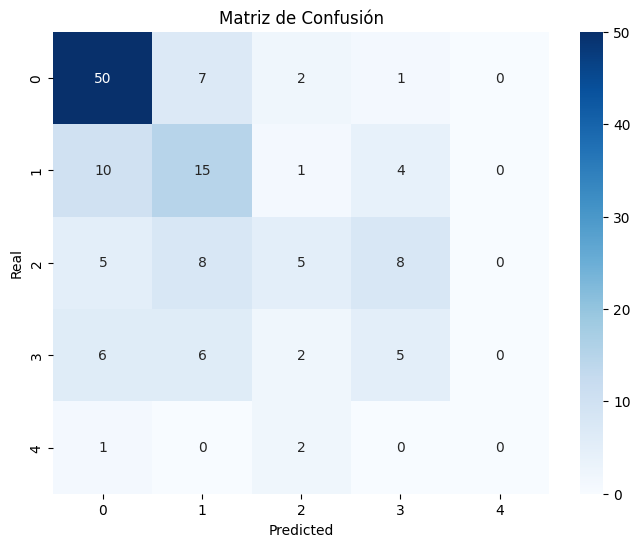

 F1 Score: 0.5149865905014646
Reporte de Clasificación Regresion Logistica TRAIN:
              precision    recall  f1-score   support

         0.0       0.69      0.83      0.76        60
         1.0       0.42      0.50      0.45        30
         2.0       0.42      0.19      0.26        26
         3.0       0.28      0.26      0.27        19
         4.0       0.00      0.00      0.00         3

    accuracy                           0.54       138
   macro avg       0.36      0.36      0.35       138
weighted avg       0.51      0.54      0.51       138

Precision TEST Clasificación:
0.5434782608695652


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [48]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
#scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar y entrenar el modelo de regresión logística multiclase
#model = LogisticRegression(max_iter=1000)
#model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model_lr.predict(X_test_scaled)


# Evaluar el modelo
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.show()

# Mostrar el reporte de clasificación
f1_rf = f1_score(y_test, y_pred, average='weighted')
print(" F1 Score:", f1_rf)


print("Reporte de Clasificación Regresion Logistica TRAIN:")
print(classification_report(y_test, y_pred))

print("Precision TEST Clasificación:")
print(test_accuracy)


## 4 - ***Aplicación del Modelo***


In [49]:
# Copia del df TEST
test_model = test_copy_dummy_d[selected_features].copy()

scaler = StandardScaler()
a = scaler.fit_transform(test_model)

# Agregar columna 'label' con las predicciones de LR
test_model['label'] = model_lr.predict(a)

# Calcular la frecuencia de los valores de la variable 'label' usando groupby
label_freq = test_model.groupby('label').size()

print(label_freq)

# Guardar el DataFrame modificado si es necesario
test_model_csv = test_model

# Mostrar el DataFrame modificado
test_model


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Aplicación de predicciones y **creacion de archivo *csv***

In [ ]:
# Creacion de ID
test_model_csv= test_model_csv['label'].reset_index()

# Renombrar la columna 'index' a 'ID'
test_model_csv['ID'] = test_model_csv.index
test_model_csv = test_model_csv[['ID', 'label']].astype(int)

# Guardar el DataFrame en un archivo CSV
test_model_csv.to_csv('sample_submission.csv', index=False)
test_model_csv

,ID,label
0,0,3
1,1,0
2,2,0
3,3,2
4,4,0
...,...,...
179,179,2
180,180,0
181,181,0
182,182,0
